# Parameter Description:

* The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: one for h1n1vaccine and one for seasonal vaccine as well as any sophisticates EDAs.

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey and there are two target variables:

* h1n1_vaccine: Whether respondent received H1N1 flu vaccine.

* seasonal_vaccine: Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below(For all binary variables: 0 = No; 1 = Yes) :

* age_group - Age group of respondent.

* education - Self-reported education level.

* race - Race of respondent.

* sex - Gender of respondent.

* income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

* marital_status - Marital status of respondent.

* rentorown - Housing situation of respondent.

* employment_status - Employment status of respondent.

* h1n1_concern - Level of concern about the H1N1 flu.

0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

* h1n1_knowledge - Level of knowledge about H1N1 flu.

0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

* behavioralwashhands - Has frequently washed hands or used hand sanitizer. (binary)

* behaviorallargegatherings - Has reduced time at large gatherings. (binary)

* behavioralantiviralmeds - Has taken antiviral medications. (binary)

* behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

* behavioralfacemask - Has bought a face mask. (binary)

* behavioraloutsidehome - Has reduced contact with people outside of own household. (binary)

* behavioraltouchface - Has avoided touching eyes, nose, or mouth. (binary)

* doctorrecch1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

* doctorreccseasonal - Seasonal flu vaccine was recommended by doctor. (binary)

* chronicmedcondition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

* childunder6_months - Has regular close contact with a child under the age of six months. (binary)

* health_worker - Is a healthcare worker. (binary)

* health_insurance - Has health insurance. (binary)

* opinionh1n1vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.

1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

* opinionh1n1risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.

1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

* opinionh1n1sickfromvacc - Respondent's worry of getting sick from taking H1N1 vaccine.

1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

* opinionseasvacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.

1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

* opinionseasrisk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.

1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

* opinionseassickfromvacc - Respondent's worry of getting sick from taking seasonal flu vaccine.

1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

* hhsgeoregion - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

* census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

* household_adults - Number of other adults in household, top-coded to 3.

* household_children - Number of children in household, top-coded to 3.

* employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

* employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

# Import libraries:

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import time

import warnings
warnings.filterwarnings('ignore')

# Import dataset:

In [2]:
data=pd.read_csv("H1N1_Flu_Vaccines.csv")

In [3]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [4]:
data.shape

(26707, 38)

In [5]:
data.drop(columns=['respondent_id','doctor_recc_h1n1','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','h1n1_vaccine'],inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_seasonal         24547 non-null  float64
 10  chronic_med_condition        25736 non-null  float64
 11  child_under_6_months         25887 non-null  float64
 12  health_worker                25903 non-null  float64
 13  health_insurance

# Total Unique Values:

In [7]:
data.nunique()

h1n1_concern                    4
h1n1_knowledge                  3
behavioral_antiviral_meds       2
behavioral_avoidance            2
behavioral_face_mask            2
behavioral_wash_hands           2
behavioral_large_gatherings     2
behavioral_outside_home         2
behavioral_touch_face           2
doctor_recc_seasonal            2
chronic_med_condition           2
child_under_6_months            2
health_worker                   2
health_insurance                2
opinion_seas_vacc_effective     5
opinion_seas_risk               5
opinion_seas_sick_from_vacc     5
age_group                       5
education                       4
race                            4
sex                             2
income_poverty                  3
marital_status                  2
rent_or_own                     2
employment_status               3
hhs_geo_region                 10
census_msa                      3
household_adults                4
household_children              4
employment_ind

# Total Missig values:

In [8]:
data.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
h

# Summary Statistics:

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0
doctor_recc_seasonal,24547.0,0.329735,0.470126,0.0,0.0,0.0,1.0,1.0


# Exploratory Data Analysis:

# Univariate Analysis:

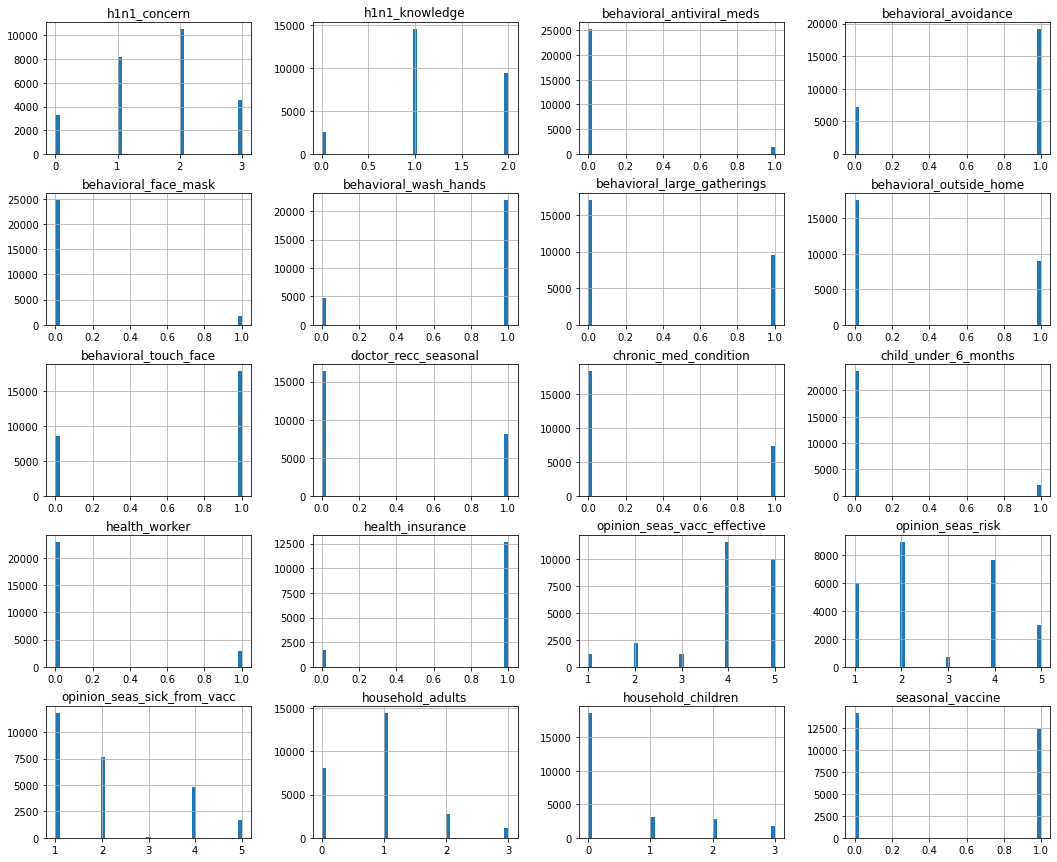

In [10]:
data.hist(bins=45, figsize=(18,15))
plt.show()

# Boxplot

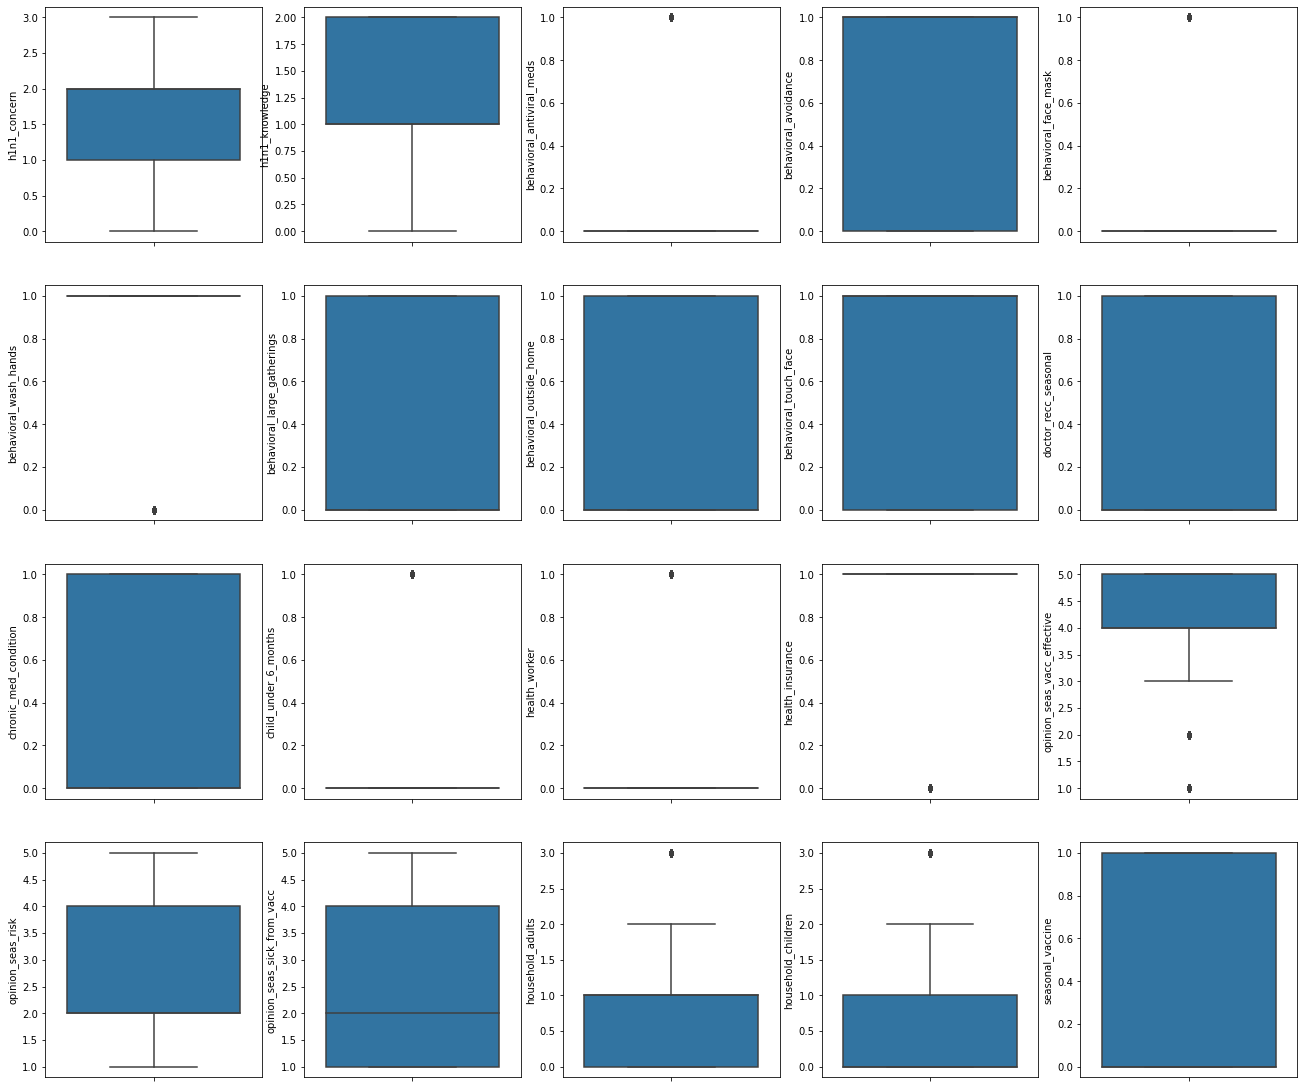

In [11]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize = (18,15))
index = 0
ax = ax.flatten()

for col, value in data.drop(columns=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']).items():
    if col != 'type':
        sns.boxplot(y = col, data = data.drop(columns=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']), ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.3, w_pad = 0.4, h_pad = 4.0)

# Distribution Plot:

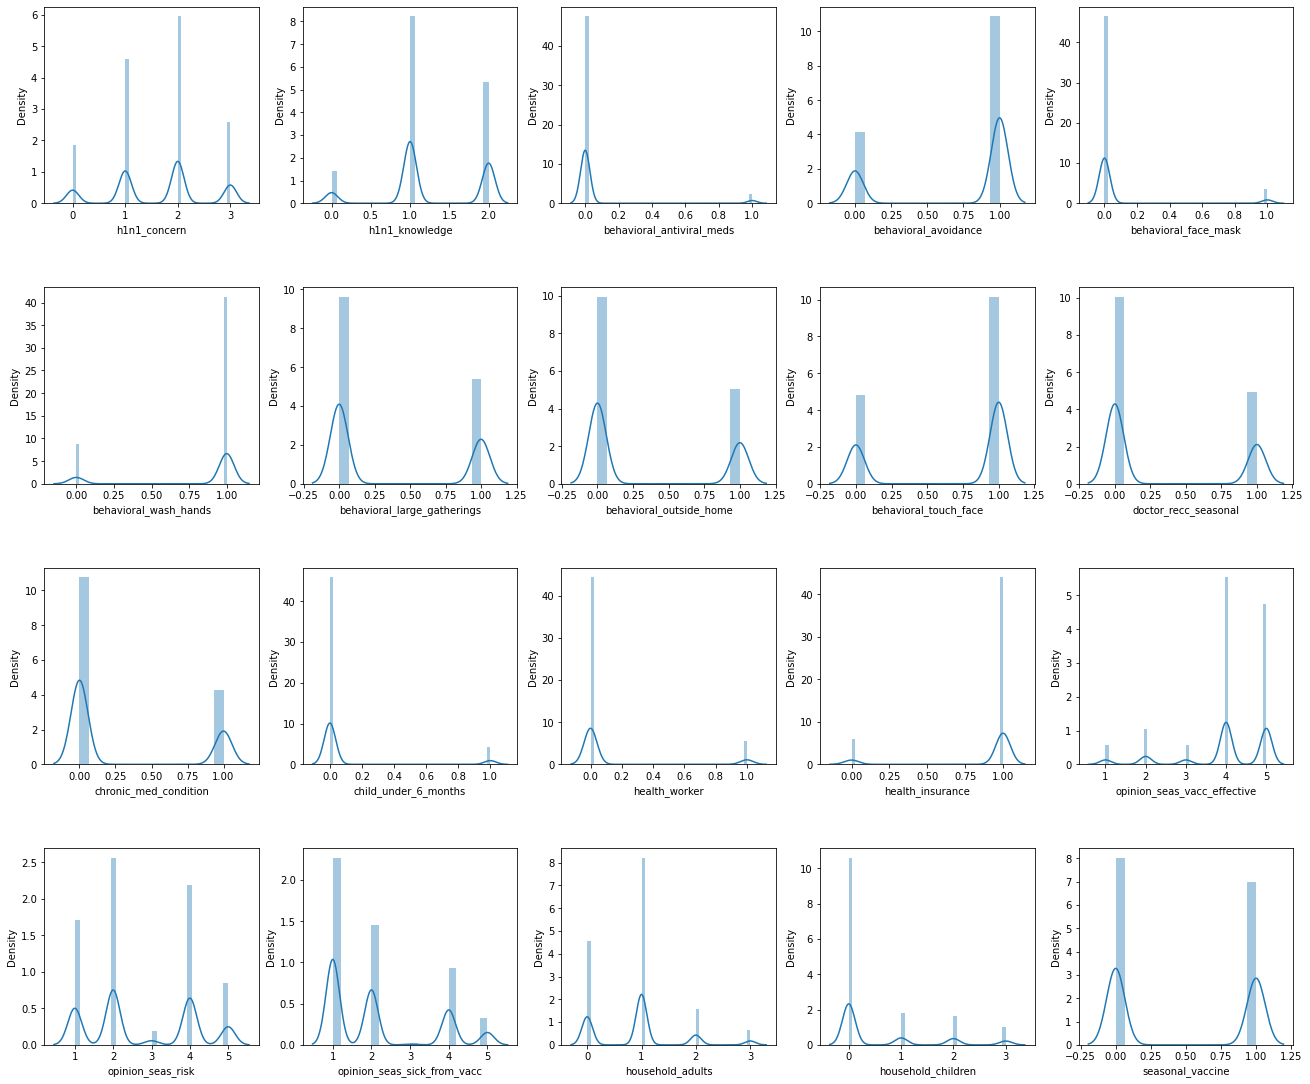

In [12]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize = (18,15))
index = 0
ax = ax.flatten()

for col, value in data.drop(columns=['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']).items():
    if col != 'type':
        sns.distplot(value, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

# Level of concern about h1n1 flu:

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

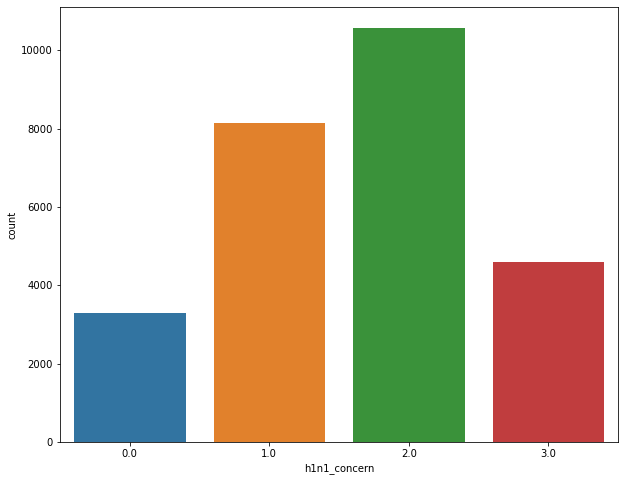

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data['h1n1_concern'])
data['h1n1_concern'].value_counts()

# h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

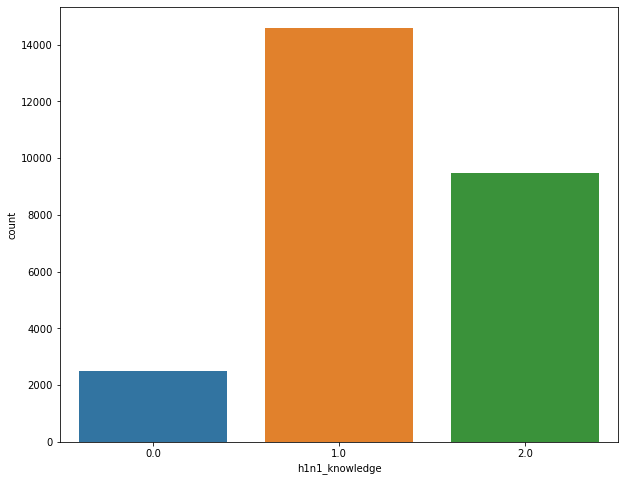

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(data['h1n1_knowledge'])
data['h1n1_knowledge'].value_counts()

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

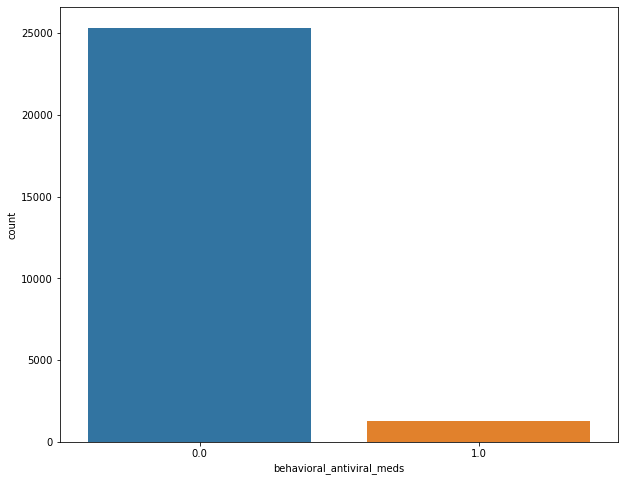

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_antiviral_meds'])
data['behavioral_antiviral_meds'].value_counts()

1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64

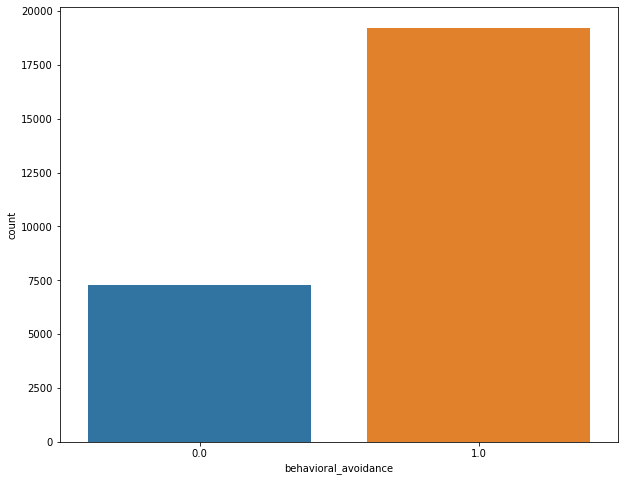

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_avoidance'])
data['behavioral_avoidance'].value_counts()

0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64

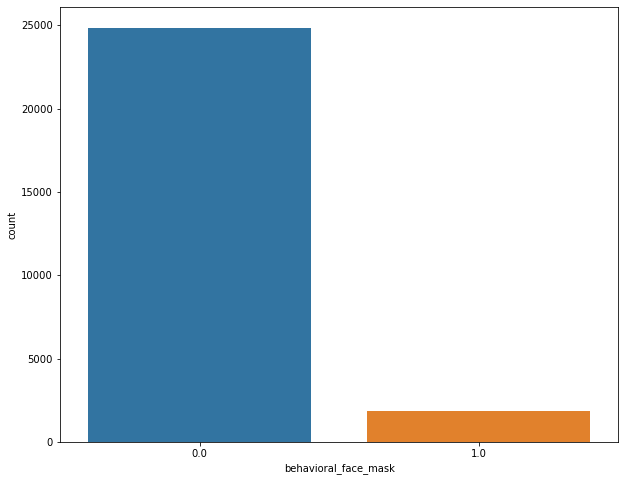

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_face_mask'])
data['behavioral_face_mask'].value_counts()

1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64

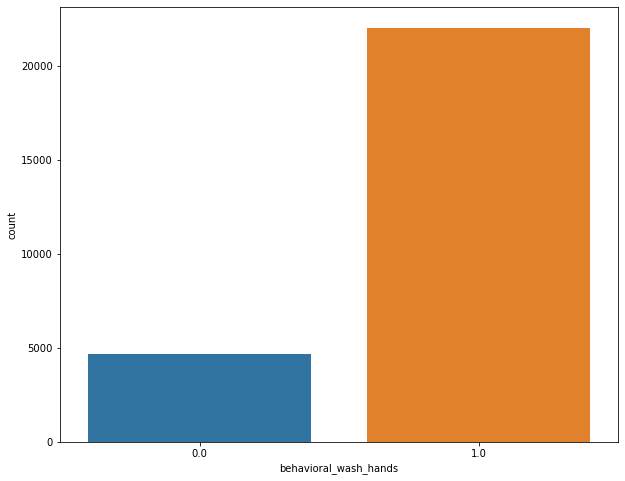

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_wash_hands'])
data['behavioral_wash_hands'].value_counts()

0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

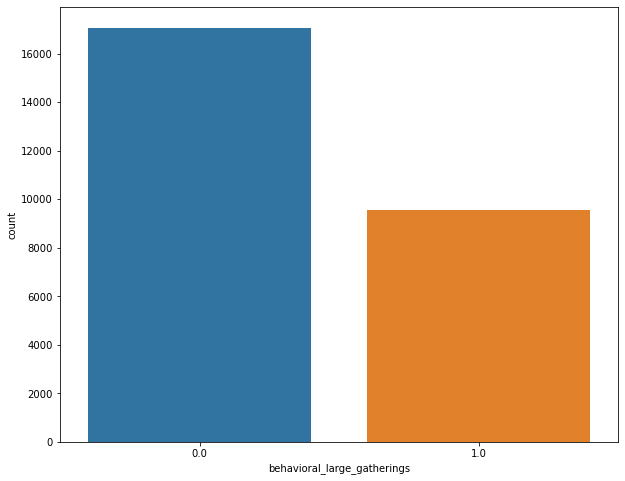

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_large_gatherings'])
data['behavioral_large_gatherings'].value_counts()

0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64

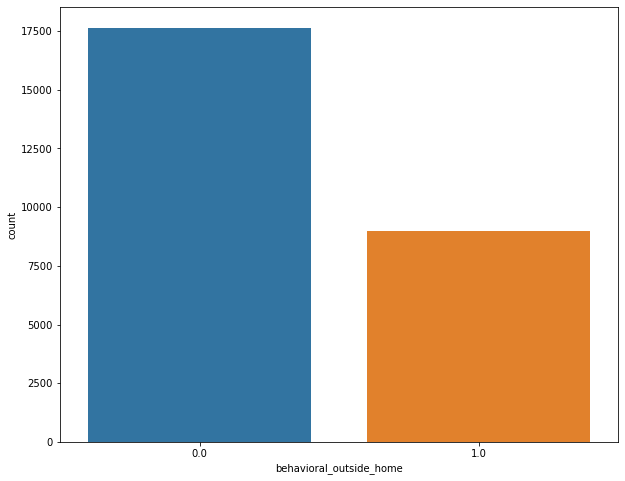

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_outside_home'])
data['behavioral_outside_home'].value_counts()

1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64

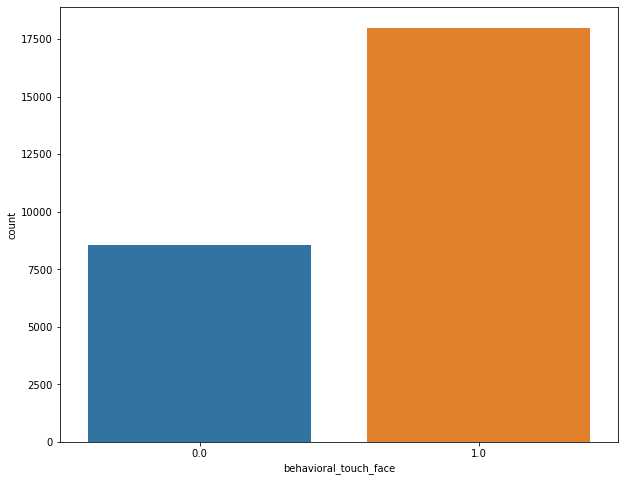

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(data['behavioral_touch_face'])
data['behavioral_touch_face'].value_counts()

0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64

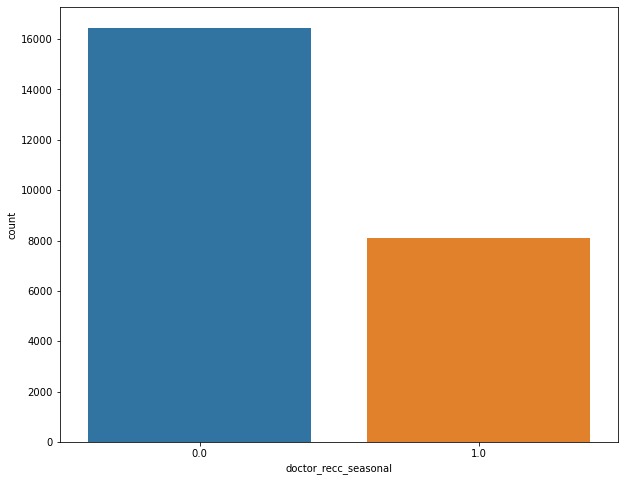

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(data['doctor_recc_seasonal'])
data['doctor_recc_seasonal'].value_counts()

0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64

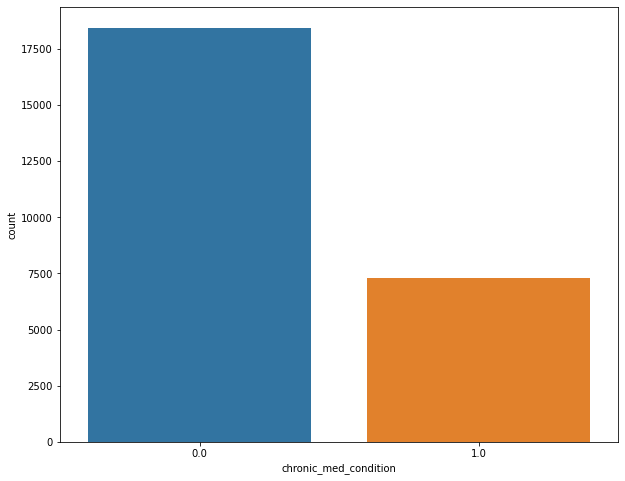

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(data['chronic_med_condition'])
data['chronic_med_condition'].value_counts()

0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64

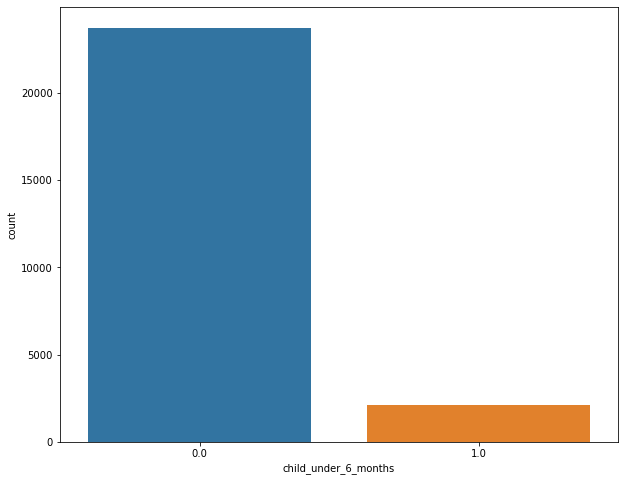

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data['child_under_6_months'])
data['child_under_6_months'].value_counts()

0.0    23004
1.0     2899
Name: health_worker, dtype: int64

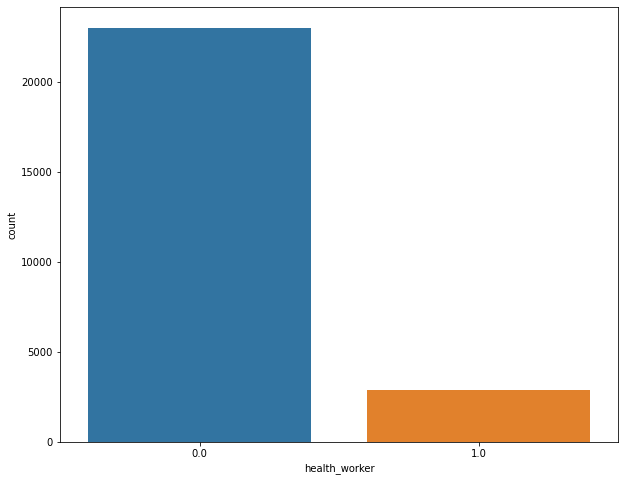

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data['health_worker'])
data['health_worker'].value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

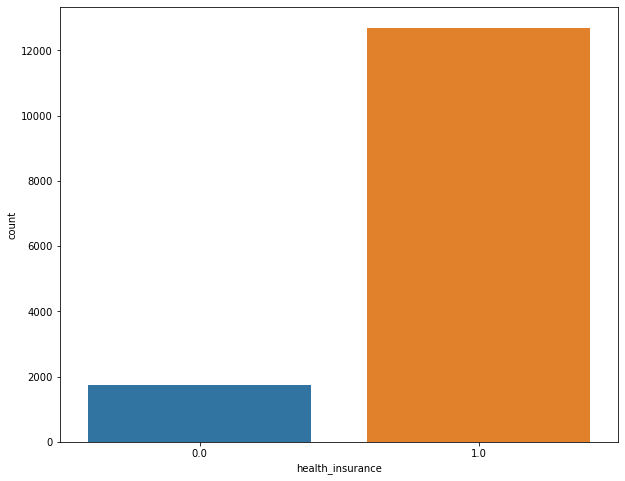

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data['health_insurance'])
data['health_insurance'].value_counts()

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: opinion_seas_vacc_effective, dtype: int64

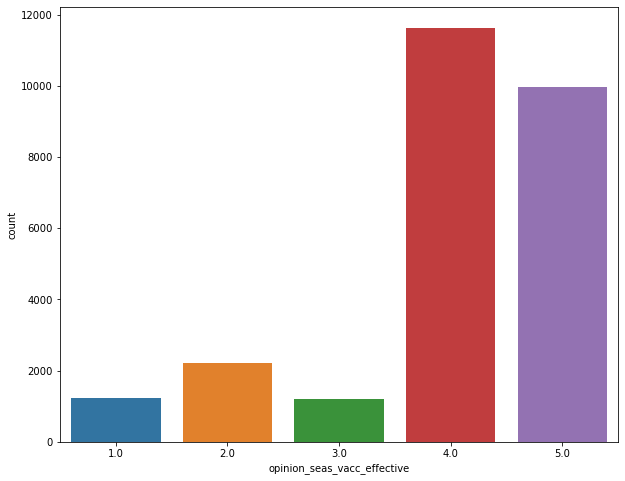

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(data['opinion_seas_vacc_effective'])
data['opinion_seas_vacc_effective'].value_counts()

#  opinionseasrisk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: opinion_seas_risk, dtype: int64

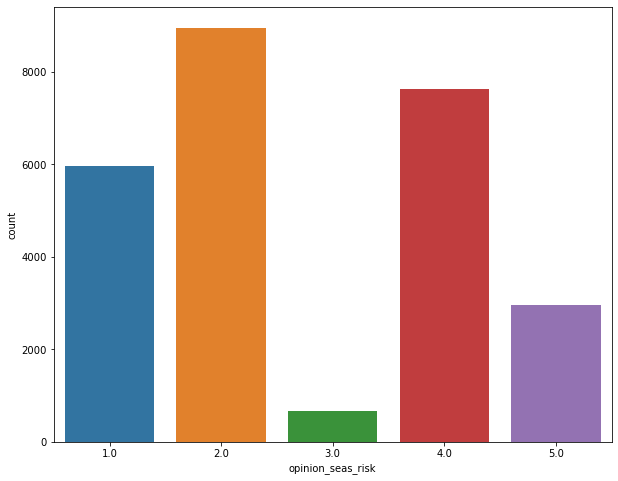

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(data['opinion_seas_risk'])
data['opinion_seas_risk'].value_counts()

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: opinion_seas_sick_from_vacc, dtype: int64

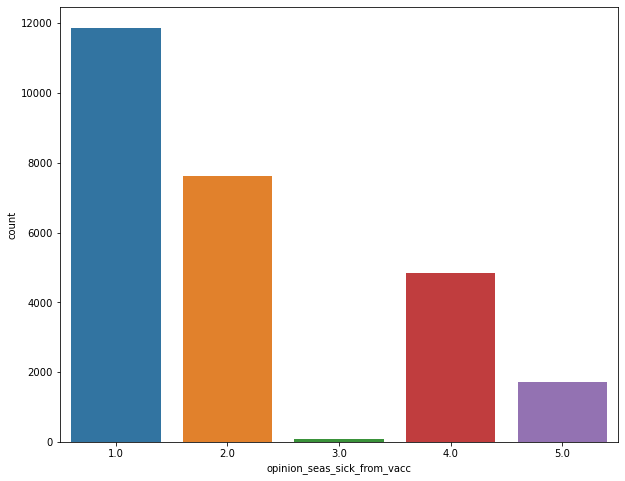

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(data['opinion_seas_sick_from_vacc'])
data['opinion_seas_sick_from_vacc'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

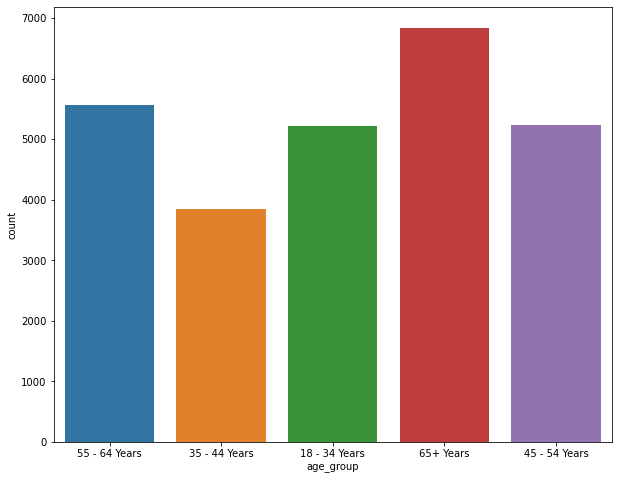

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(data['age_group'])
data['age_group'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

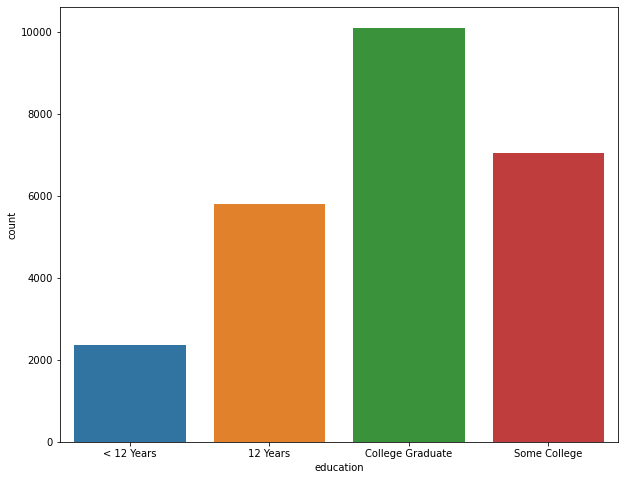

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(data['education'])
data['education'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

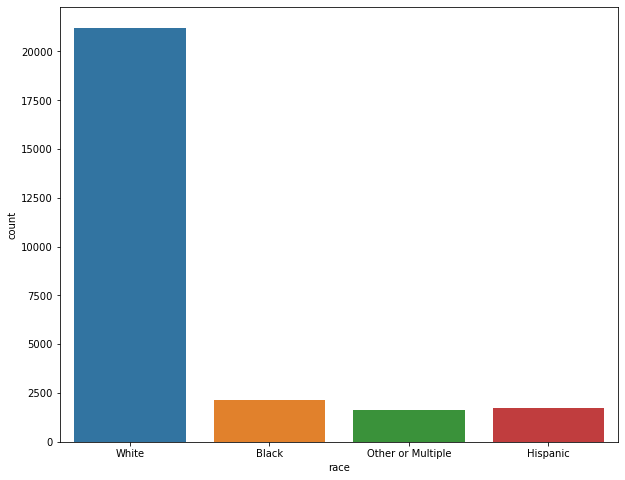

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(data['race'])
data['race'].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

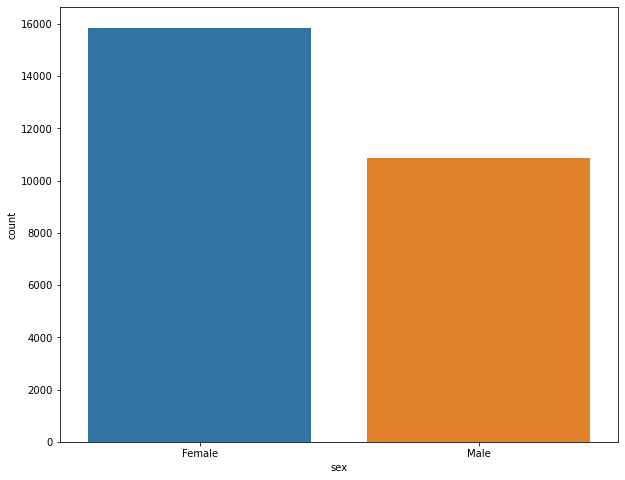

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(data['sex'])
data['sex'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

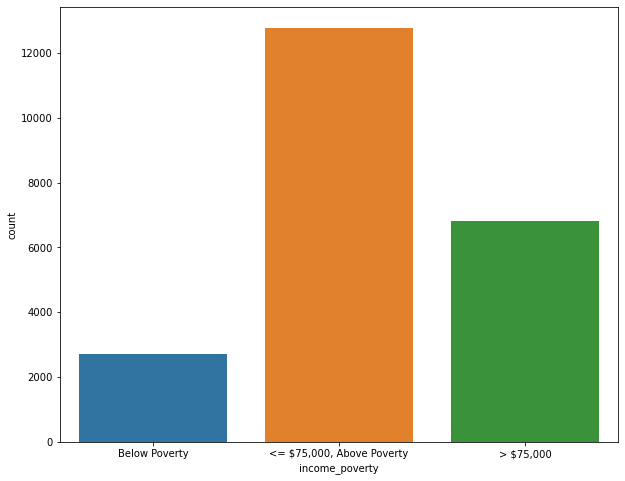

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(data['income_poverty'])
data['income_poverty'].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

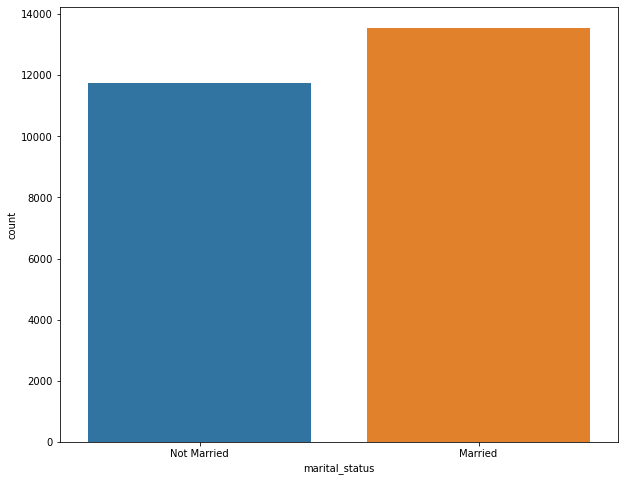

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(data['marital_status'])
data['marital_status'].value_counts()

Own     18736
Rent     5929
Name: rent_or_own, dtype: int64

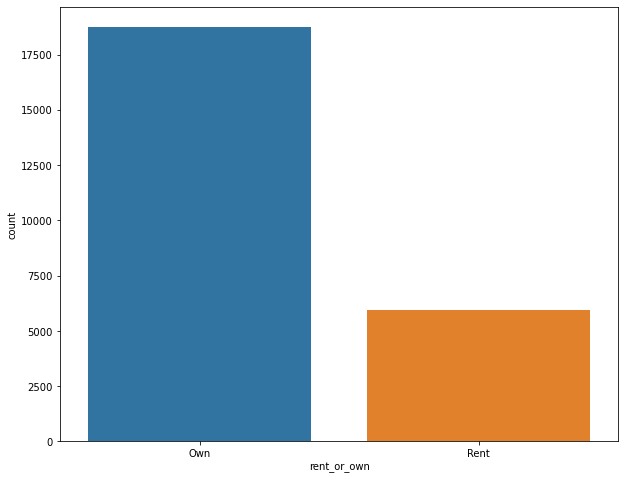

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(data['rent_or_own'])
data['rent_or_own'].value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

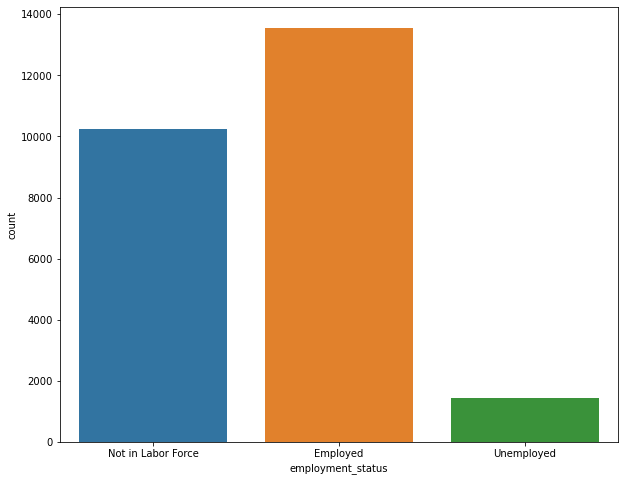

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(data['employment_status'])
data['employment_status'].value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

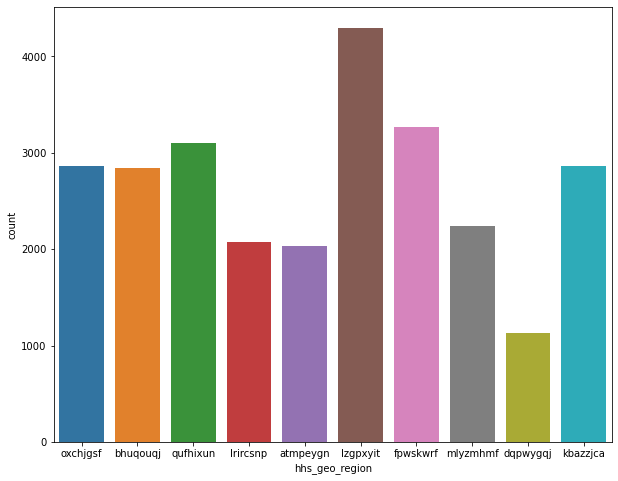

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(data['hhs_geo_region'])
data['hhs_geo_region'].value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

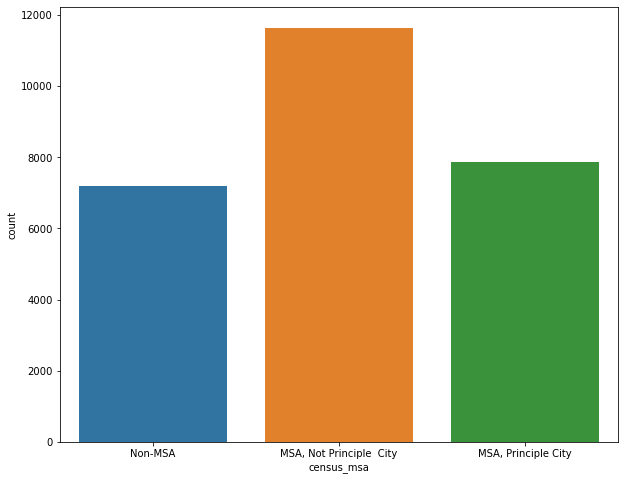

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(data['census_msa'])
data['census_msa'].value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: household_adults, dtype: int64

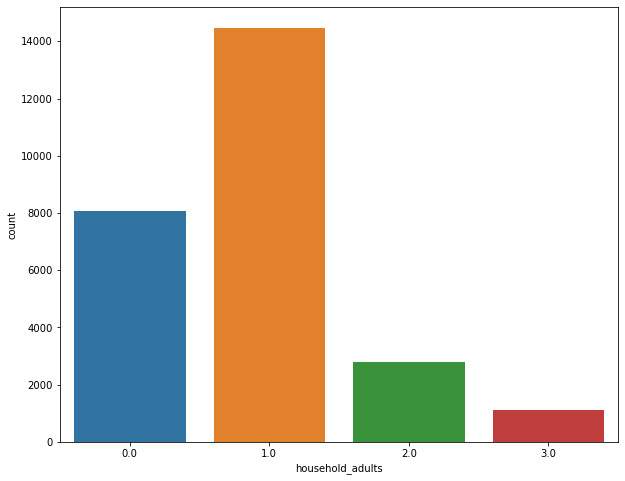

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(data['household_adults'])
data['household_adults'].value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: household_children, dtype: int64

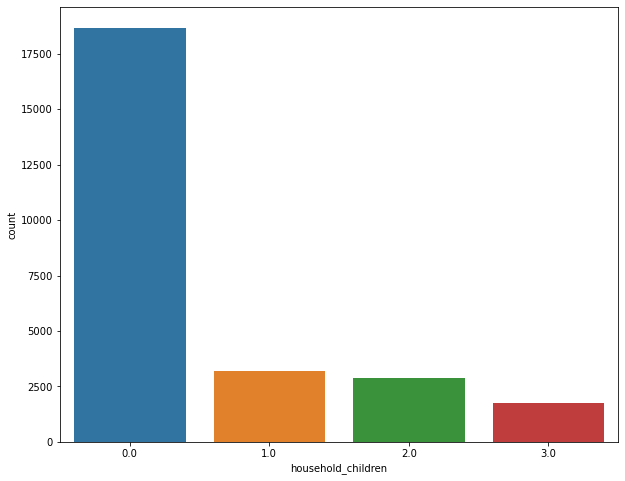

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(data['household_children'])
data['household_children'].value_counts()

<AxesSubplot:xlabel='employment_industry', ylabel='count'>

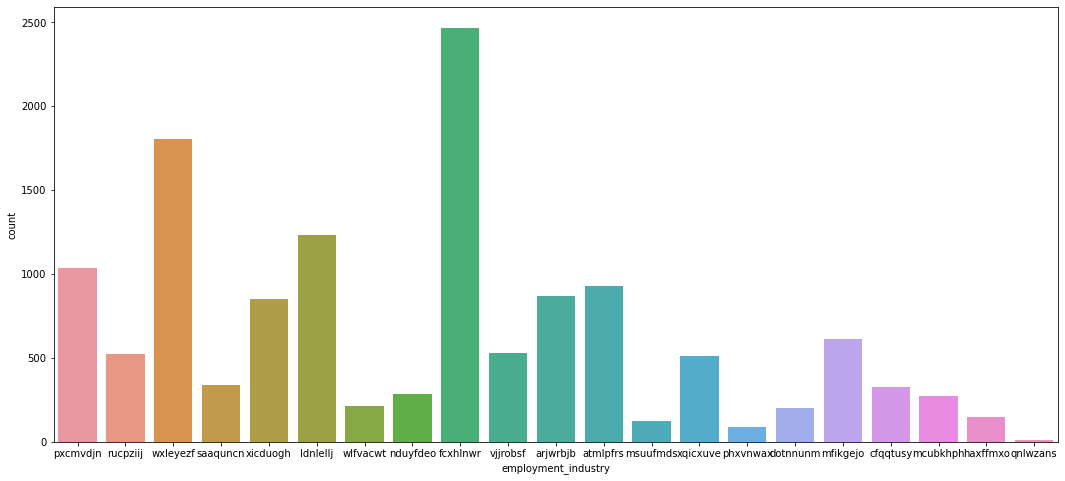

In [42]:
plt.figure(figsize=(18,8))
sns.countplot(data['employment_industry'])

<AxesSubplot:xlabel='employment_occupation', ylabel='count'>

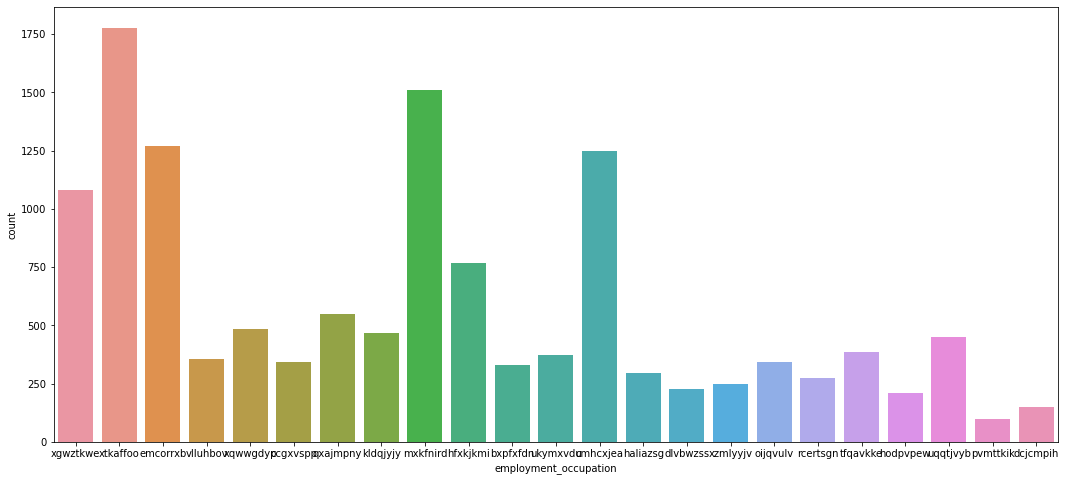

In [43]:
plt.figure(figsize=(18,8))
sns.countplot(data['employment_occupation'])

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

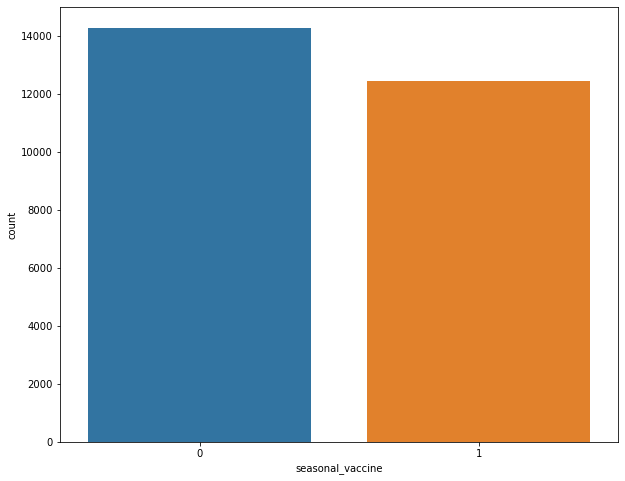

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(data['seasonal_vaccine'])
data['seasonal_vaccine'].value_counts()

# Bivariate Analysis:

<AxesSubplot:xlabel='h1n1_concern', ylabel='count'>

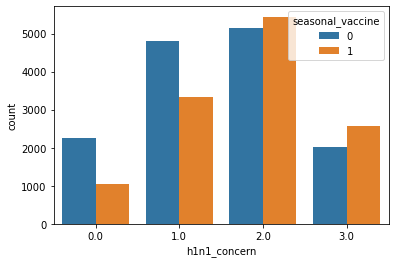

In [45]:
sns.countplot(x='h1n1_concern',hue='seasonal_vaccine',data=data)

* People who are more concerned about seasonal vaccines are more likely to be vaccinated.

<AxesSubplot:xlabel='h1n1_knowledge', ylabel='count'>

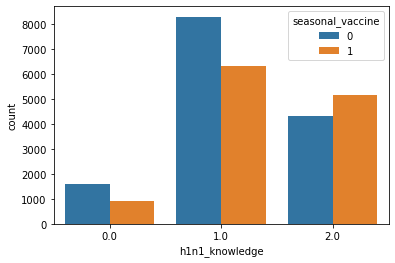

In [46]:
sns.countplot(x='h1n1_knowledge',hue='seasonal_vaccine',data=data)

* People who have more knowledge of seasonal vaccine have taken more vaccine.

<AxesSubplot:xlabel='behavioral_antiviral_meds', ylabel='count'>

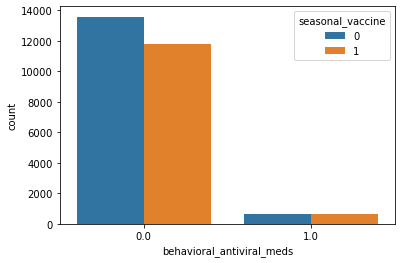

In [47]:
sns.countplot(x='behavioral_antiviral_meds',hue='seasonal_vaccine',data=data)

* There are very few people who take antiviral medications and 50% of them get vaccinated while the rest do not.

* And there are a lot of people who didn't take antiviral medication who have also taken a good amount of vaccine.

# behavioral_avoidance - Has avoided close contact with others with flu-like symptoms

<AxesSubplot:xlabel='behavioral_avoidance', ylabel='count'>

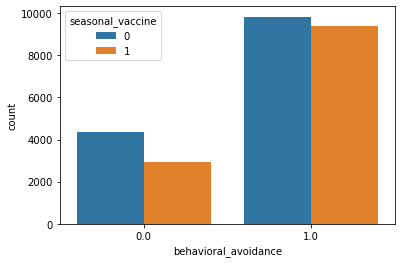

In [48]:
sns.countplot(x='behavioral_avoidance',hue='seasonal_vaccine',data=data)

* more people has avoid close contact with others with flu like symptoms and also getting vaccinated.

<AxesSubplot:xlabel='behavioral_face_mask', ylabel='count'>

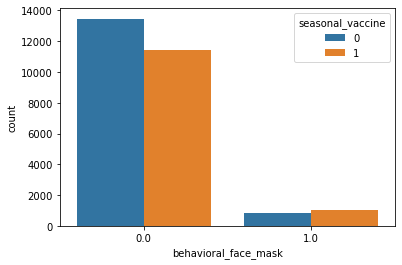

In [49]:
sns.countplot(x='behavioral_face_mask',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_wash_hands', ylabel='count'>

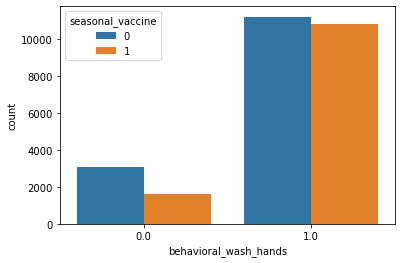

In [50]:
sns.countplot(x='behavioral_wash_hands',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_large_gatherings', ylabel='count'>

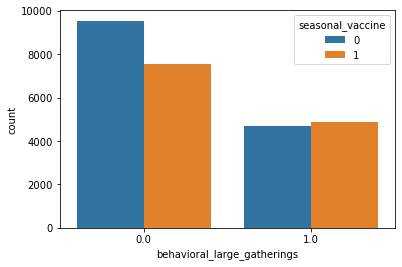

In [51]:
sns.countplot(x='behavioral_large_gatherings',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_outside_home', ylabel='count'>

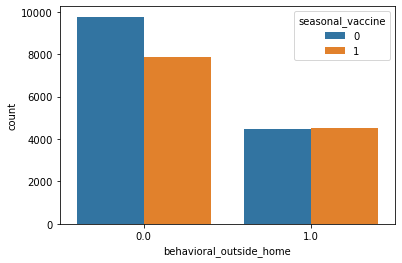

In [52]:
sns.countplot(x='behavioral_outside_home',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_touch_face', ylabel='count'>

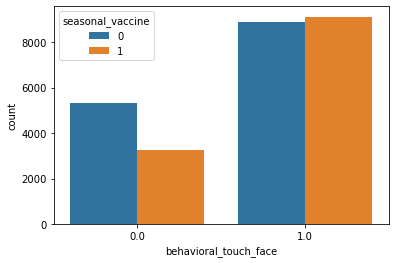

In [53]:
sns.countplot(x='behavioral_touch_face',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='doctor_recc_seasonal', ylabel='count'>

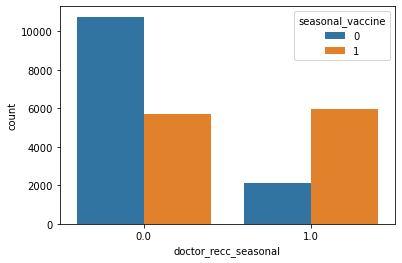

In [54]:
sns.countplot(x='doctor_recc_seasonal',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='chronic_med_condition', ylabel='count'>

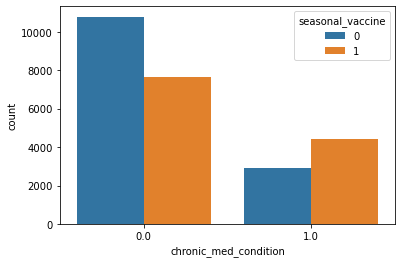

In [55]:
sns.countplot(x='chronic_med_condition',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='child_under_6_months', ylabel='count'>

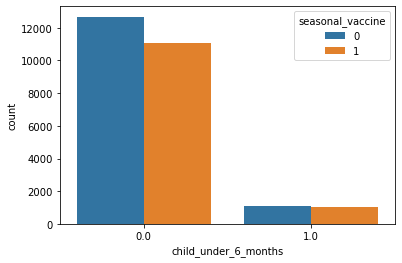

In [56]:
sns.countplot(x='child_under_6_months',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='health_worker', ylabel='count'>

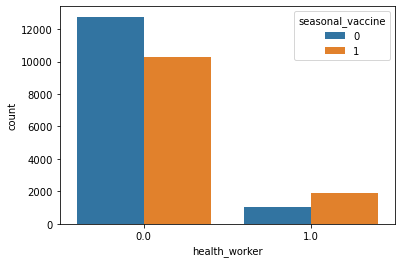

In [57]:
sns.countplot(x='health_worker',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='health_insurance', ylabel='count'>

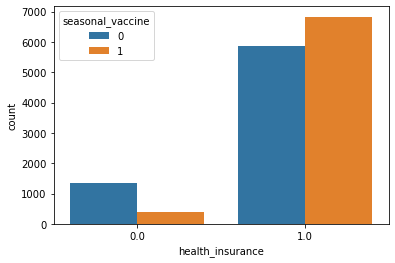

In [58]:
sns.countplot(x='health_insurance',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='opinion_seas_vacc_effective', ylabel='count'>

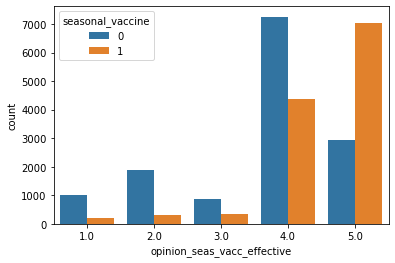

In [59]:
sns.countplot(x='opinion_seas_vacc_effective',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='opinion_seas_risk', ylabel='count'>

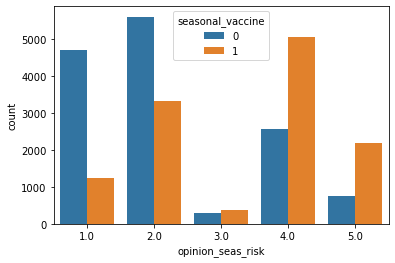

In [60]:
sns.countplot(x='opinion_seas_risk',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='opinion_seas_sick_from_vacc', ylabel='count'>

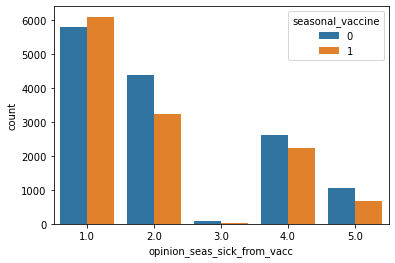

In [61]:
sns.countplot(x='opinion_seas_sick_from_vacc',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='age_group', ylabel='count'>

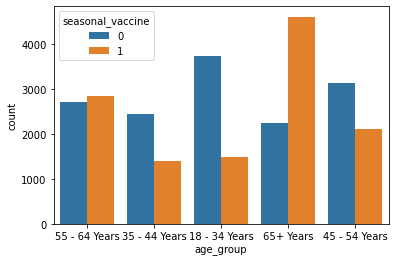

In [62]:
sns.countplot(x='age_group',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='education', ylabel='count'>

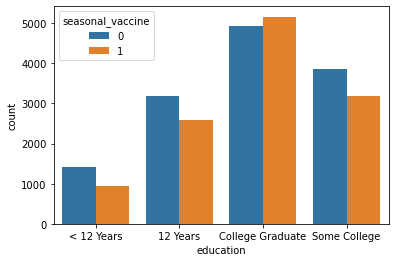

In [63]:
sns.countplot(x='education',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='race', ylabel='count'>

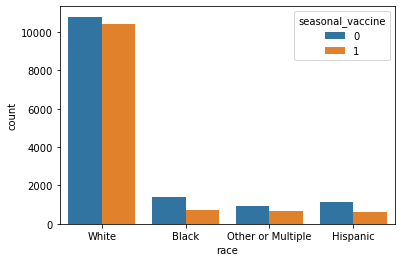

In [64]:
sns.countplot(x='race',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

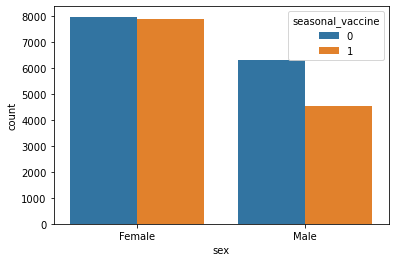

In [65]:
sns.countplot(x='sex',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='income_poverty', ylabel='count'>

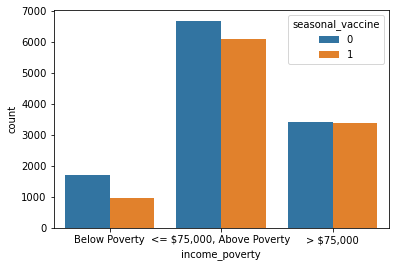

In [66]:
sns.countplot(x='income_poverty',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

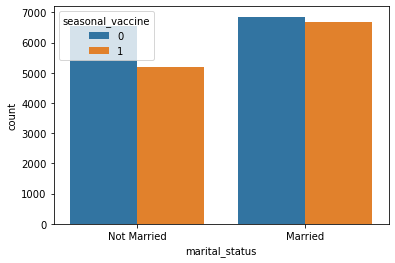

In [67]:
sns.countplot(x='marital_status',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='rent_or_own', ylabel='count'>

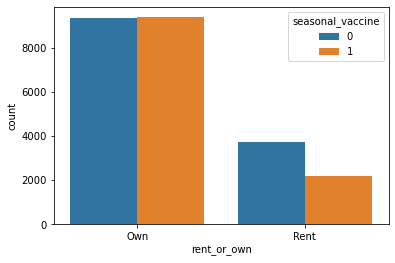

In [68]:
sns.countplot(x='rent_or_own',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='employment_status', ylabel='count'>

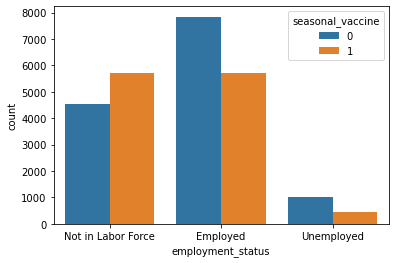

In [69]:
sns.countplot(x='employment_status',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='hhs_geo_region', ylabel='count'>

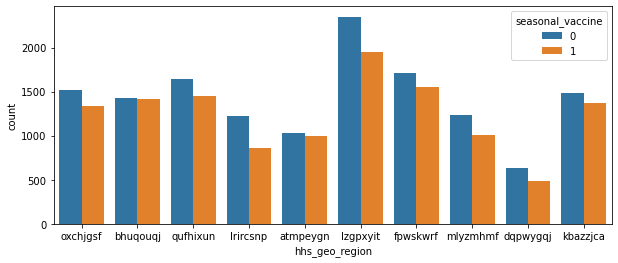

In [70]:
plt.figure(figsize=(10,4))
sns.countplot(x='hhs_geo_region',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='census_msa', ylabel='count'>

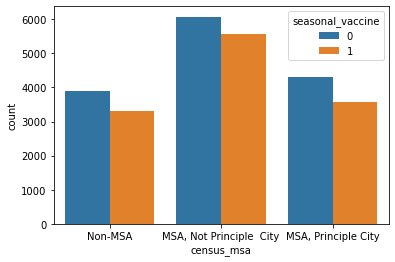

In [71]:
sns.countplot(x='census_msa',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='household_adults', ylabel='count'>

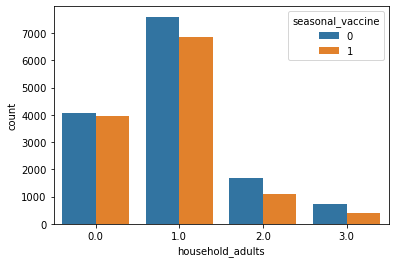

In [72]:
sns.countplot(x='household_adults',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='household_children', ylabel='count'>

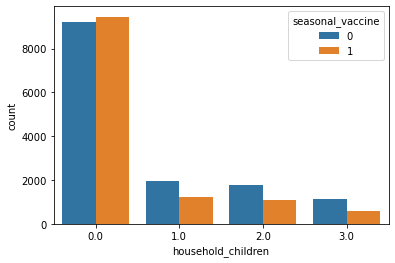

In [73]:
sns.countplot(x='household_children',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='employment_industry', ylabel='count'>

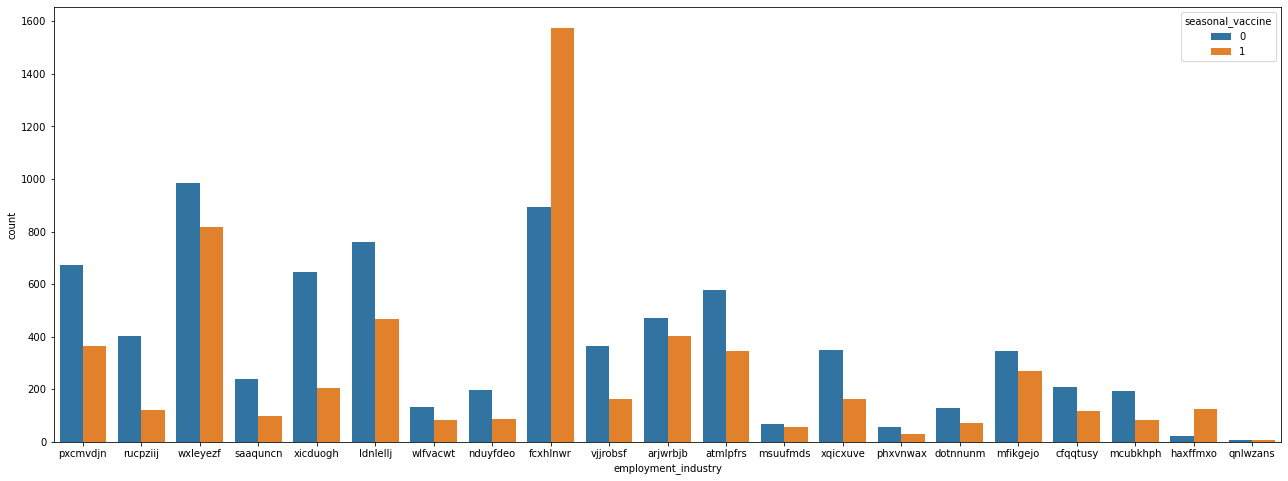

In [74]:
plt.figure(figsize=(22,8))
sns.countplot(x='employment_industry',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='employment_occupation', ylabel='count'>

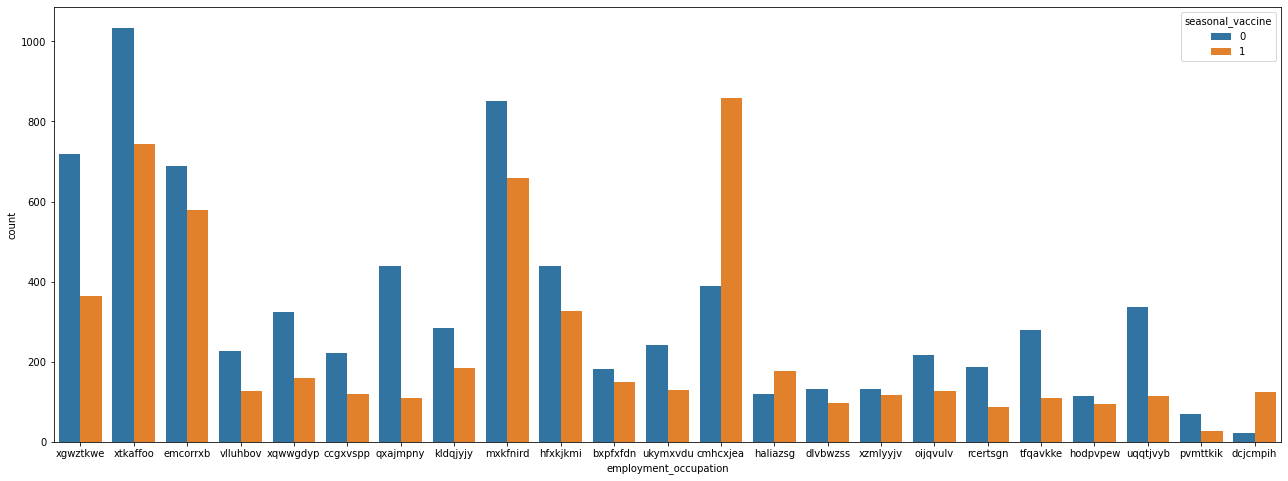

In [75]:
plt.figure(figsize=(22,8))
sns.countplot(x='employment_occupation',hue='seasonal_vaccine',data=data)

# Multivariate Analysis:

<AxesSubplot:xlabel='h1n1_knowledge', ylabel='h1n1_concern'>

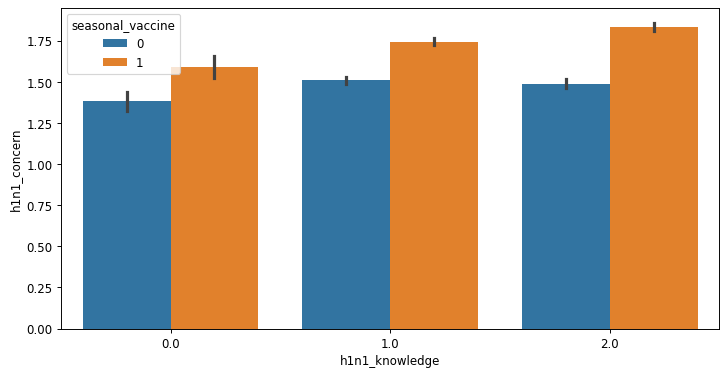

In [76]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='h1n1_knowledge',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_antiviral_meds', ylabel='h1n1_concern'>

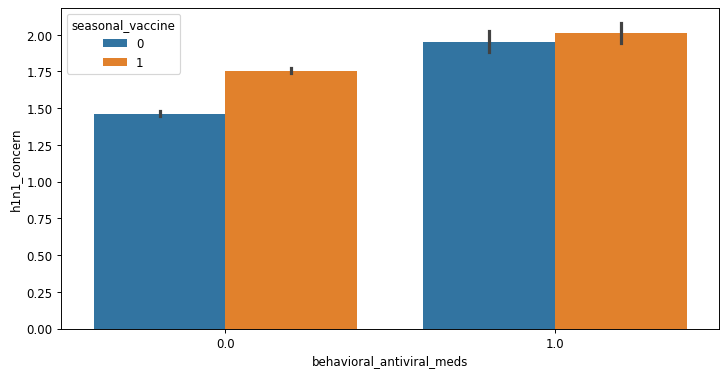

In [77]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='behavioral_antiviral_meds',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_avoidance', ylabel='h1n1_concern'>

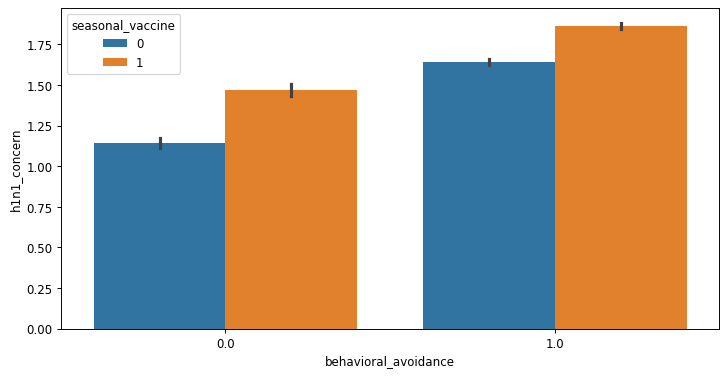

In [78]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='behavioral_avoidance',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_face_mask', ylabel='h1n1_concern'>

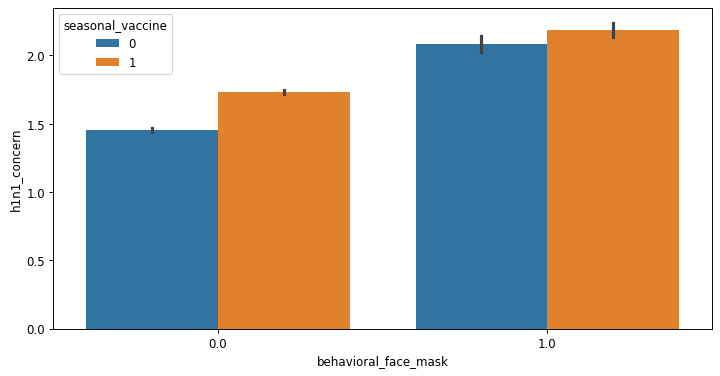

In [79]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='behavioral_face_mask',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_wash_hands', ylabel='h1n1_concern'>

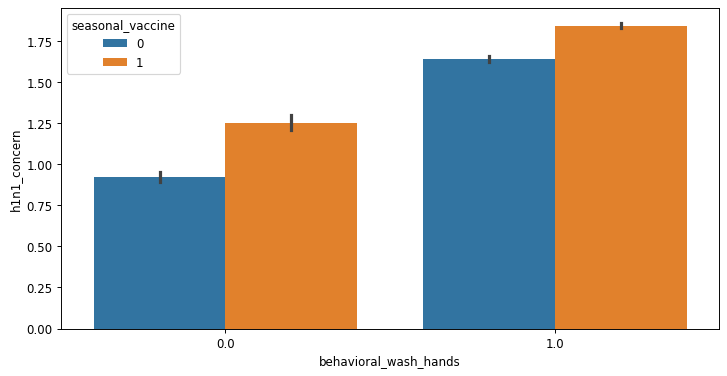

In [80]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='behavioral_wash_hands',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_large_gatherings', ylabel='h1n1_concern'>

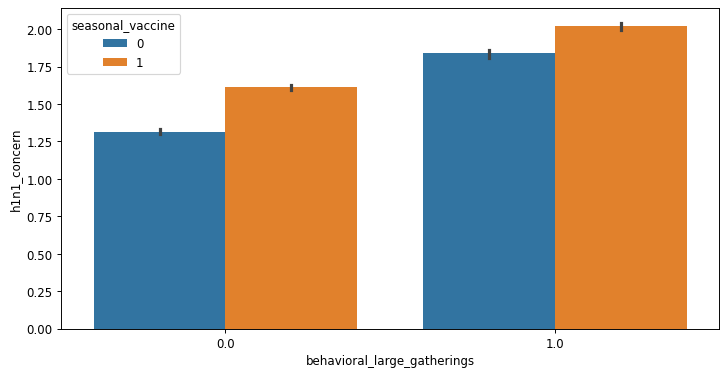

In [81]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='behavioral_large_gatherings',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_outside_home', ylabel='h1n1_concern'>

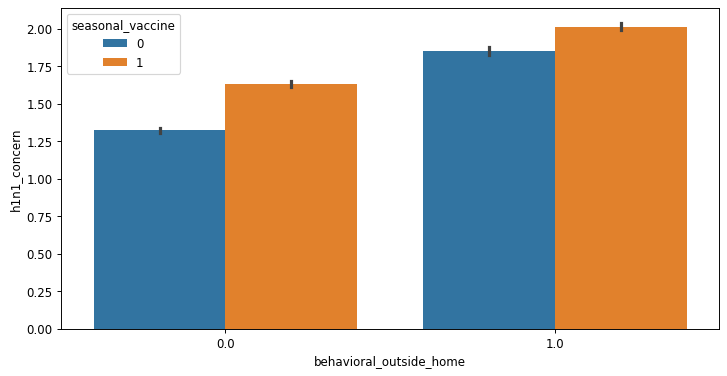

In [82]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='behavioral_outside_home',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='behavioral_touch_face', ylabel='h1n1_concern'>

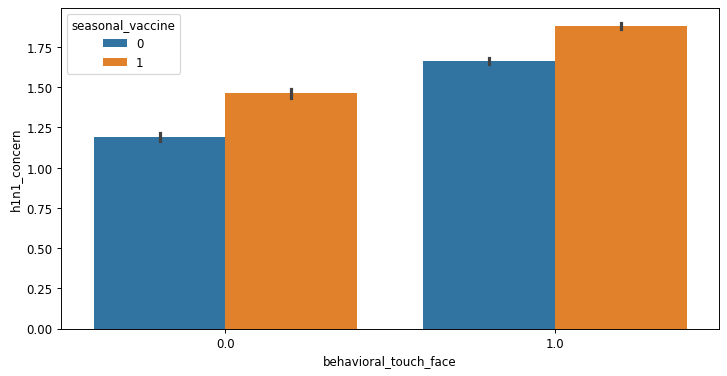

In [83]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='behavioral_touch_face',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='doctor_recc_seasonal', ylabel='h1n1_concern'>

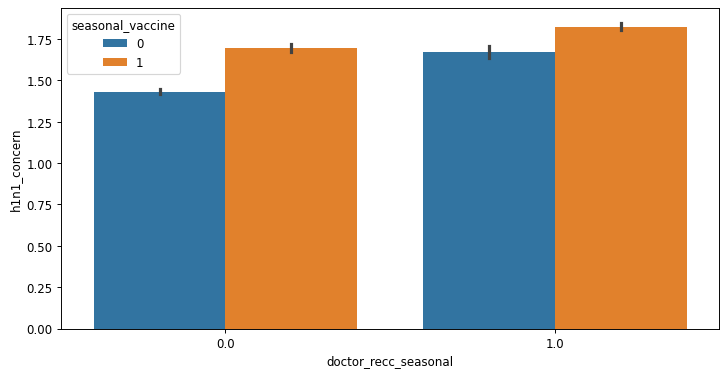

In [84]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='doctor_recc_seasonal',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='chronic_med_condition', ylabel='h1n1_concern'>

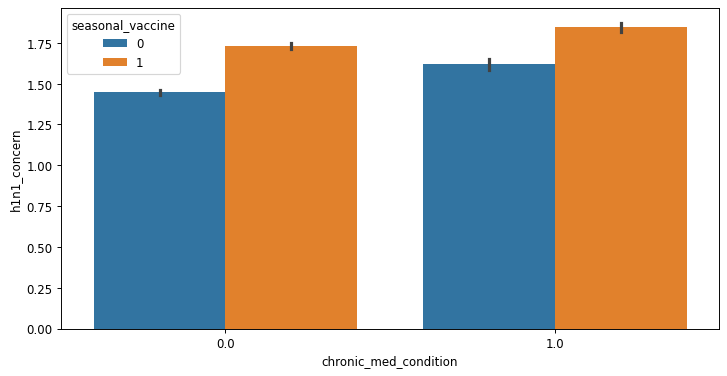

In [85]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='chronic_med_condition',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='child_under_6_months', ylabel='h1n1_concern'>

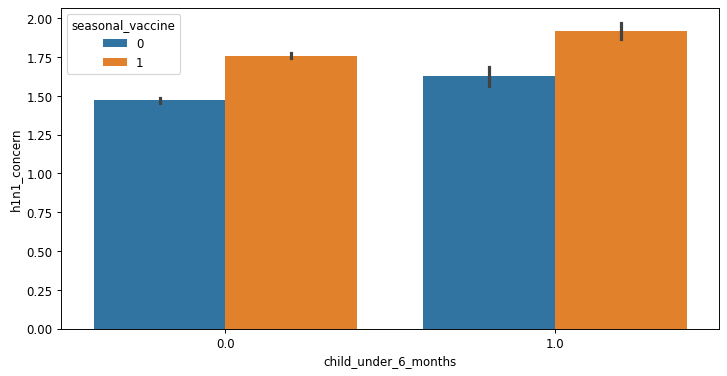

In [86]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='child_under_6_months',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='health_worker', ylabel='h1n1_concern'>

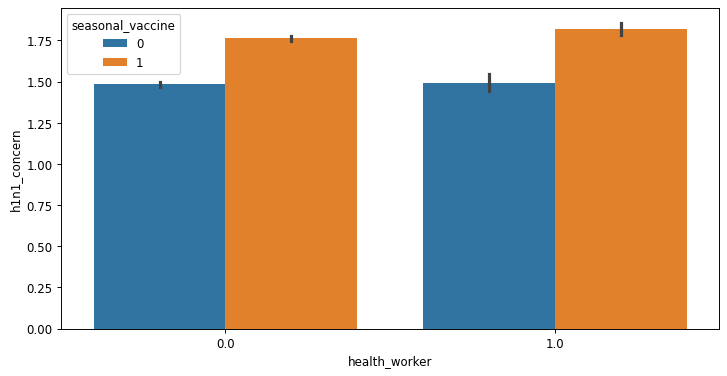

In [87]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='health_worker',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='health_insurance', ylabel='h1n1_concern'>

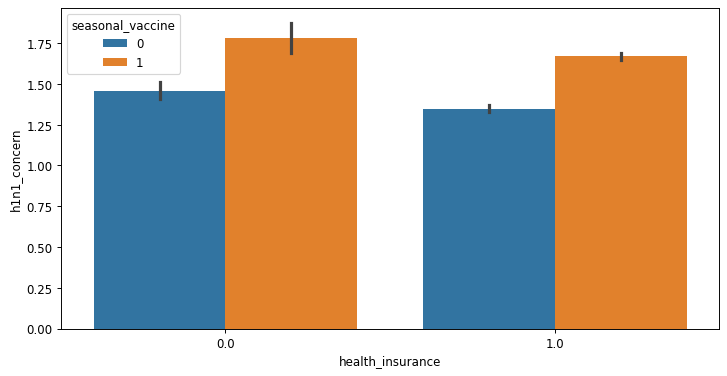

In [88]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='health_insurance',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='opinion_seas_vacc_effective', ylabel='h1n1_concern'>

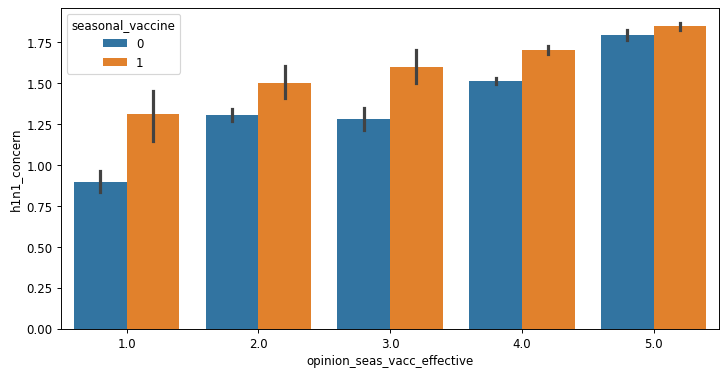

In [89]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='opinion_seas_vacc_effective',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='opinion_seas_risk', ylabel='h1n1_concern'>

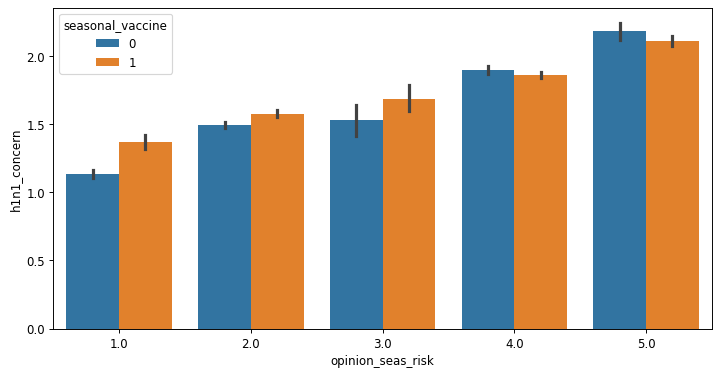

In [90]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='opinion_seas_risk',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='opinion_seas_sick_from_vacc', ylabel='h1n1_concern'>

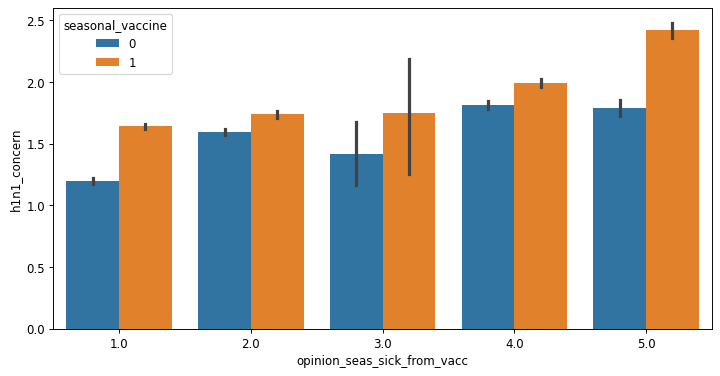

In [91]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='opinion_seas_sick_from_vacc',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='age_group', ylabel='h1n1_concern'>

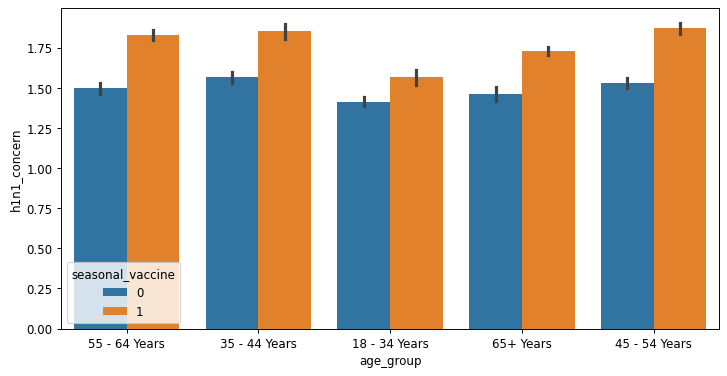

In [92]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='age_group',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='education', ylabel='h1n1_concern'>

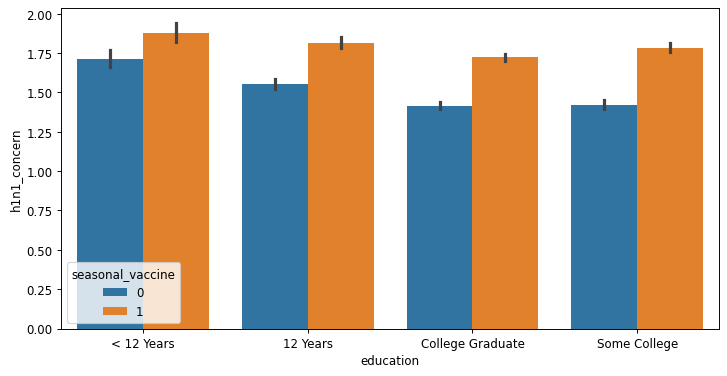

In [93]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='education',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='race', ylabel='h1n1_concern'>

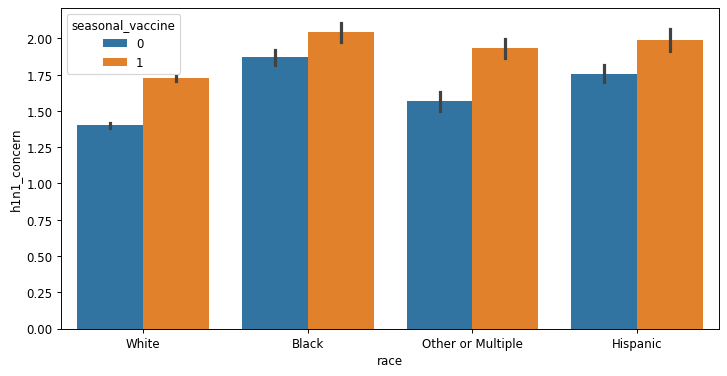

In [94]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='race',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='sex', ylabel='h1n1_concern'>

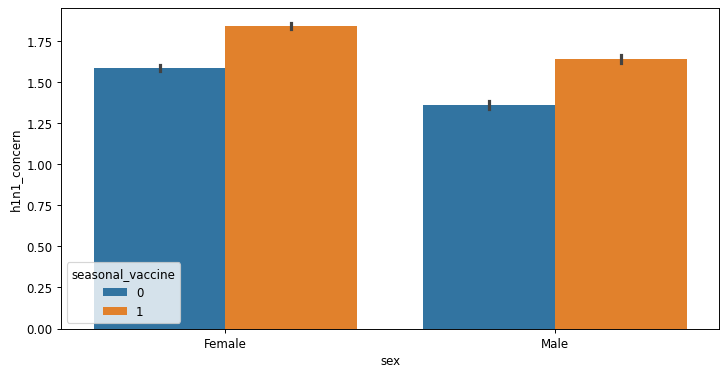

In [95]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='sex',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='income_poverty', ylabel='h1n1_concern'>

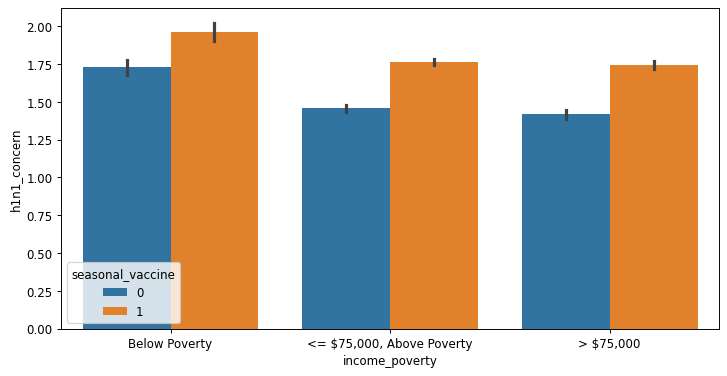

In [96]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='income_poverty',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='marital_status', ylabel='h1n1_concern'>

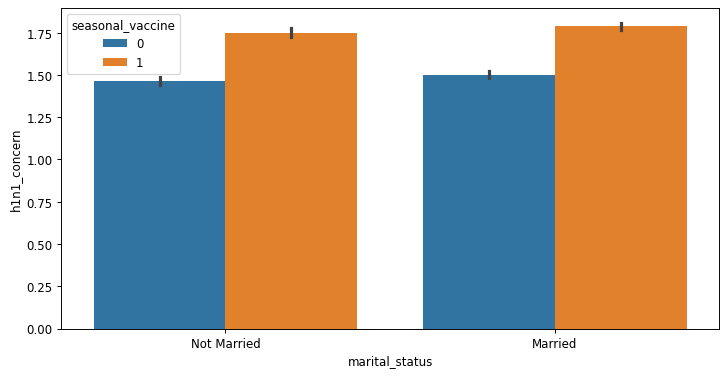

In [97]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='marital_status',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='rent_or_own', ylabel='h1n1_concern'>

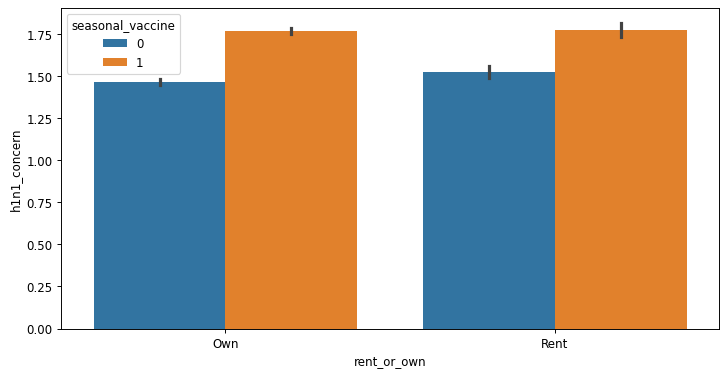

In [98]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='rent_or_own',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='employment_status', ylabel='h1n1_concern'>

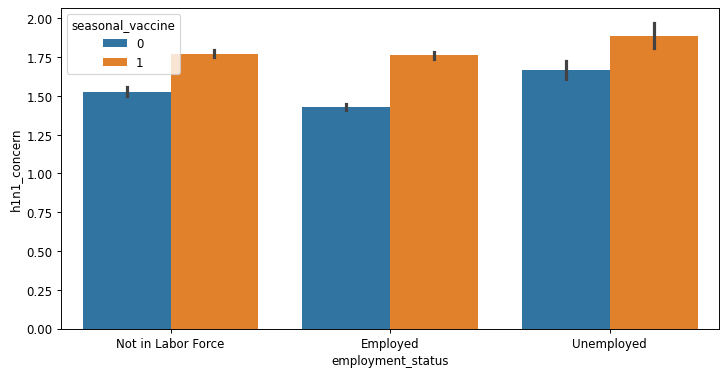

In [99]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='employment_status',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='hhs_geo_region', ylabel='h1n1_concern'>

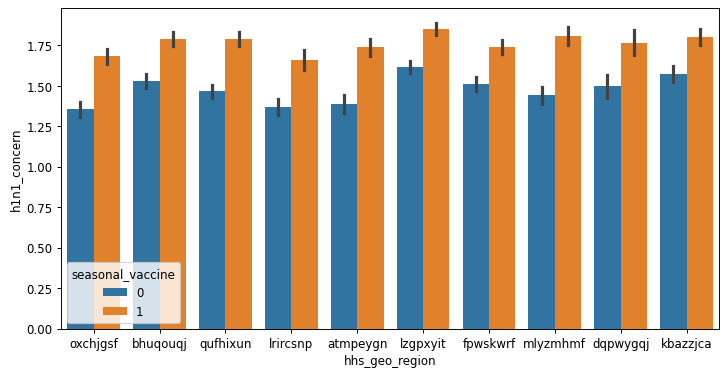

In [100]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='hhs_geo_region',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='census_msa', ylabel='h1n1_concern'>

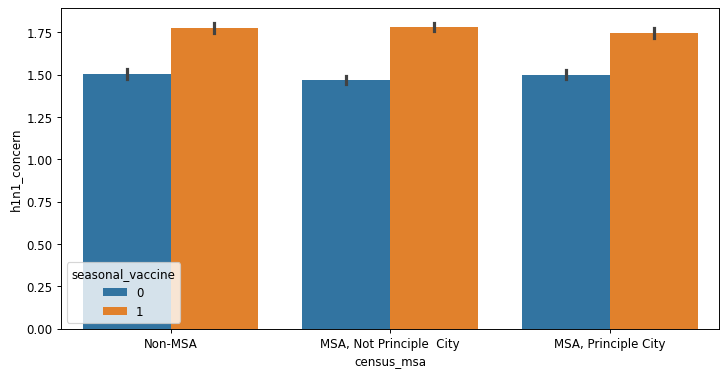

In [101]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='census_msa',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='household_adults', ylabel='h1n1_concern'>

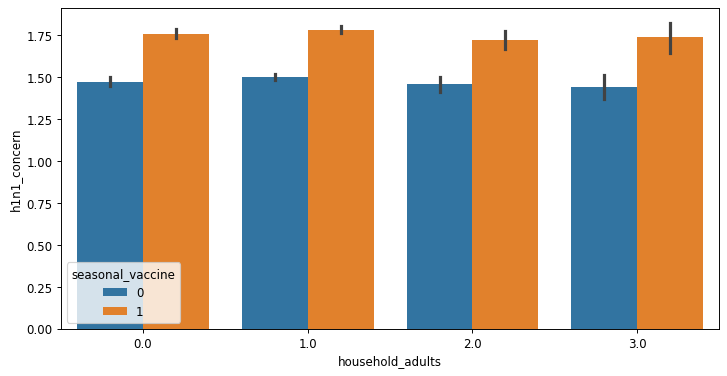

In [102]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='household_adults',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='household_children', ylabel='h1n1_concern'>

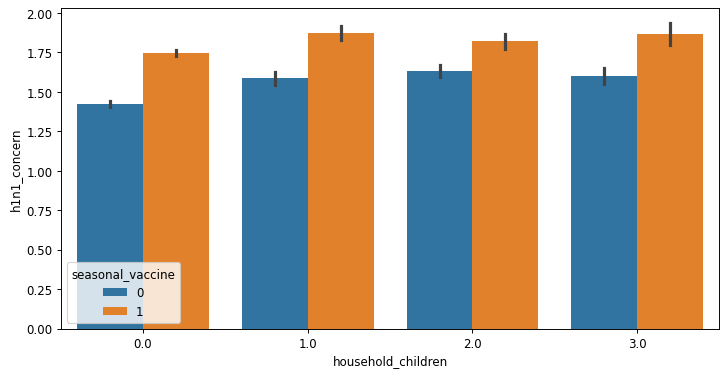

In [103]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='household_children',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='employment_industry', ylabel='h1n1_concern'>

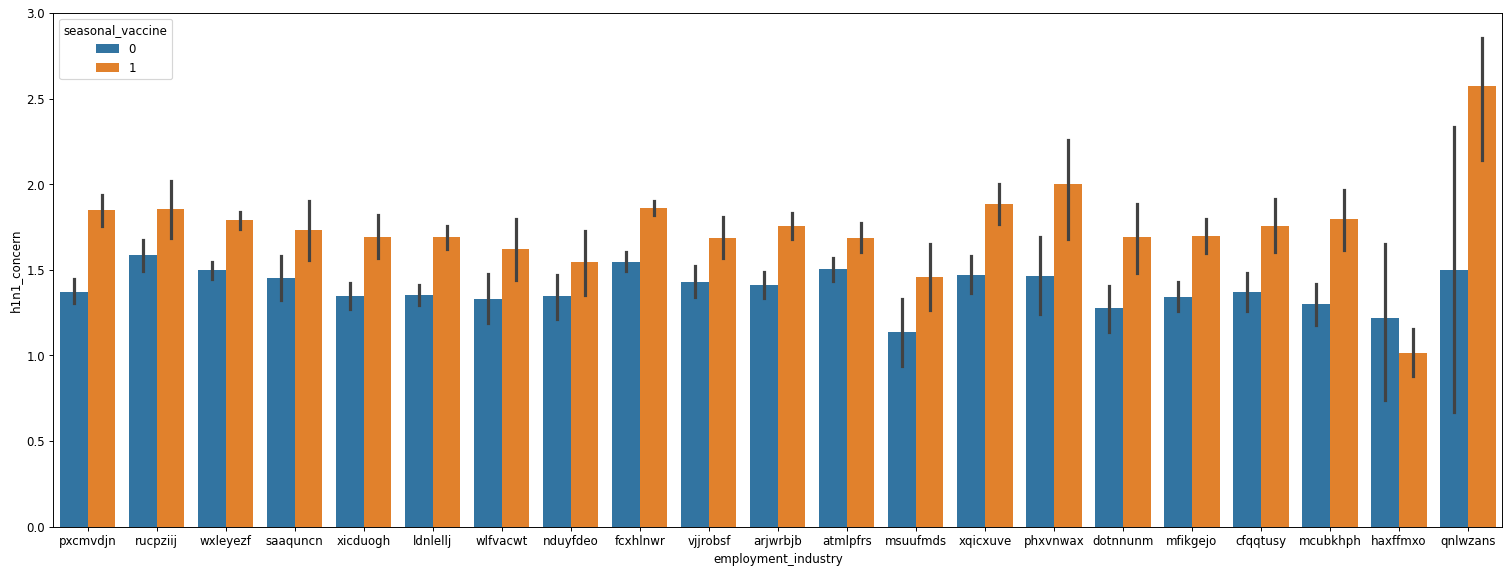

In [104]:
plt.figure(figsize=[22,8],dpi=85)
sns.barplot(x='employment_industry',y='h1n1_concern',hue='seasonal_vaccine',data=data)

<AxesSubplot:xlabel='employment_occupation', ylabel='h1n1_concern'>

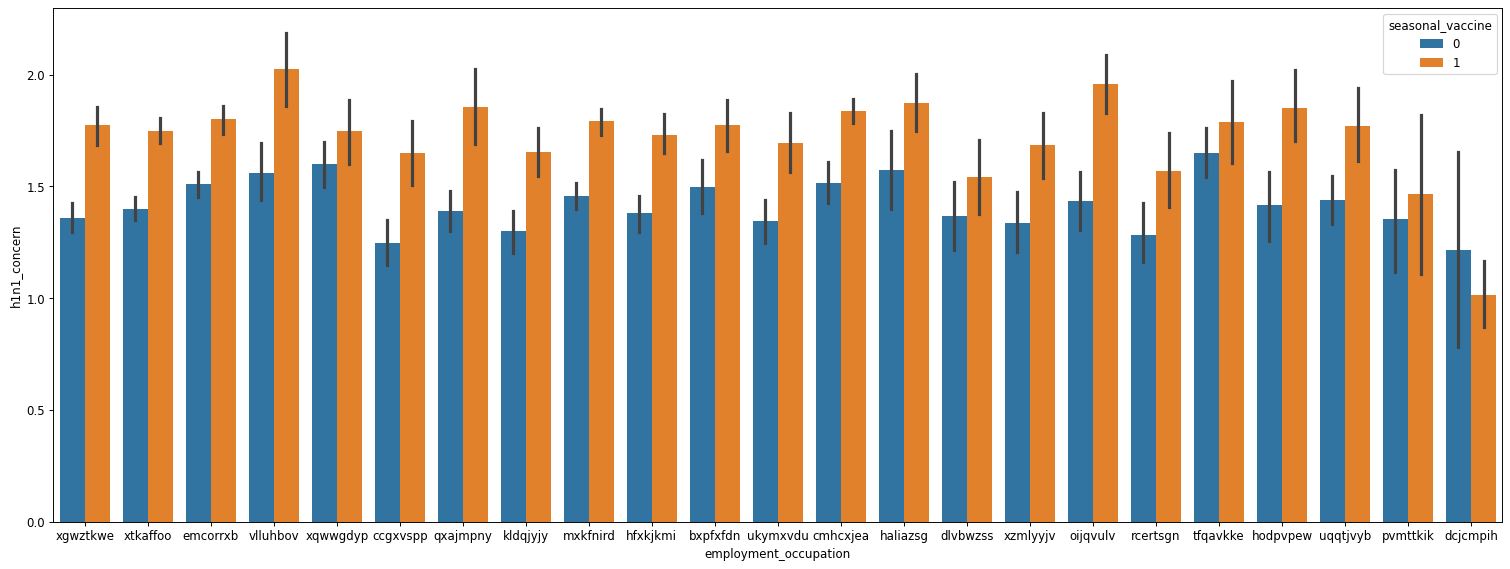

In [105]:
plt.figure(figsize=[22,8],dpi=85)
sns.barplot(x='employment_occupation',y='h1n1_concern',hue='seasonal_vaccine',data=data)

# Heatmap:

<AxesSubplot:title={'center':'Correlation of all the Columns'}>

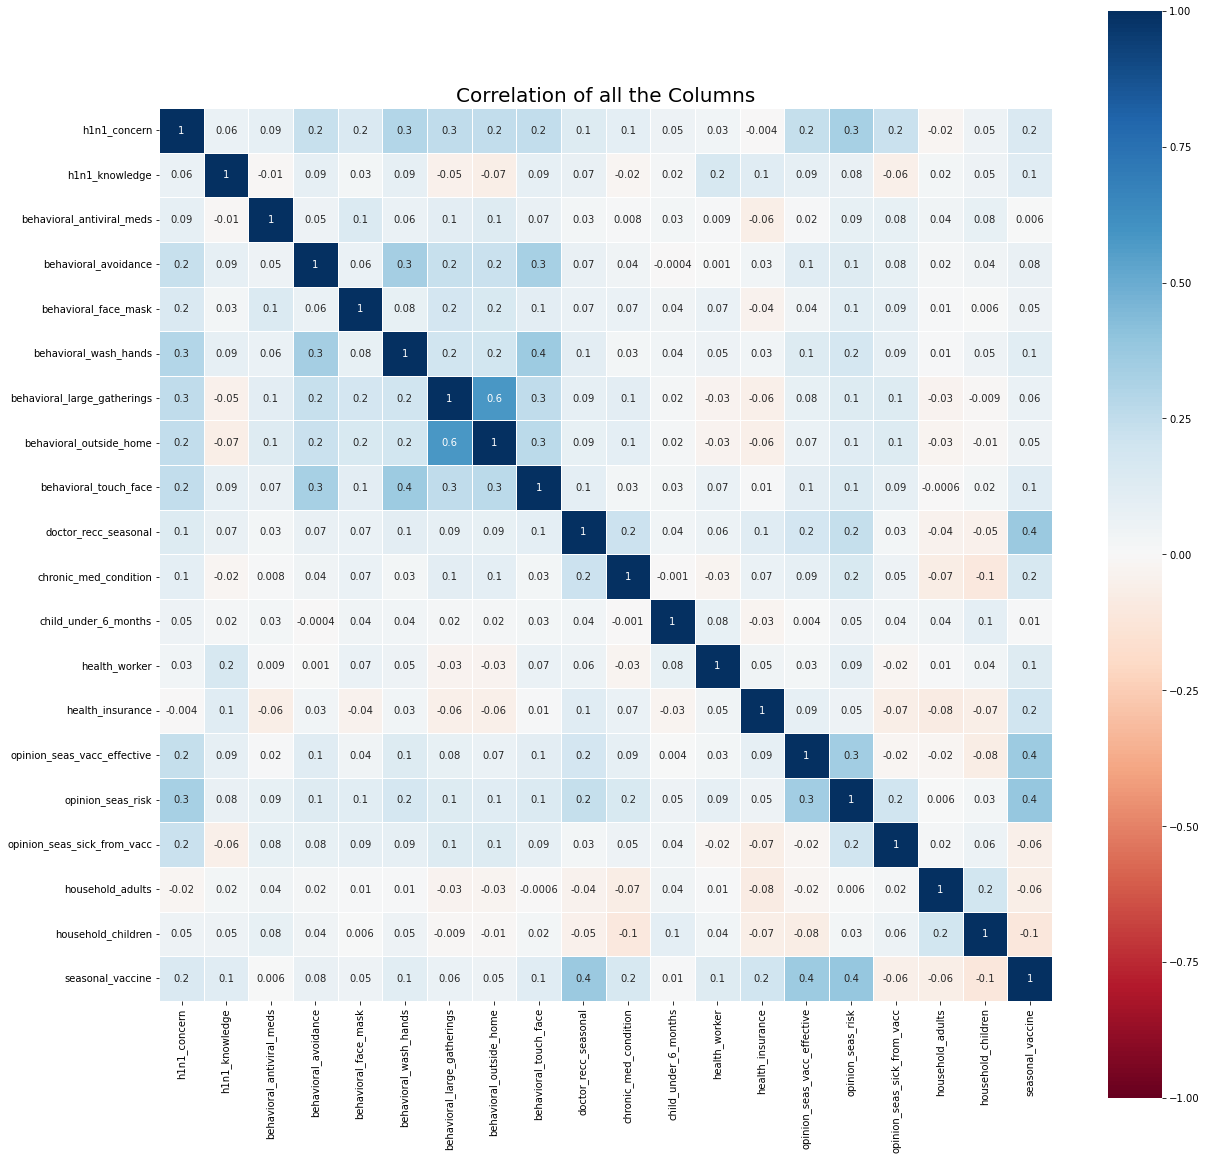

In [106]:
plt.figure(figsize = (20,20))
plt.title('Correlation of all the Columns', fontsize = 20)
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, center = 0, fmt = '.1g', linewidths = 1, linecolor = 'white', 
            square = True, cmap ='RdBu')

# Impute Missing Values:

In [107]:
data.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
h

In [108]:
columns=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','doctor_recc_seasonal','chronic_med_condition','child_under_6_months','health_worker','health_insurance','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','education','income_poverty','marital_status','rent_or_own','employment_status','household_adults','household_children','employment_industry','employment_occupation']

In [109]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [110]:
data[columns]=imputer.fit_transform(data[columns])

In [111]:
data[columns].head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,...,opinion_seas_sick_from_vacc,education,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,< 12 Years,Below Poverty,Not Married,Own,Not in Labor Force,0.0,0.0,fcxhlnwr,xtkaffoo
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,12 Years,Below Poverty,Not Married,Rent,Employed,0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,College Graduate,"<= $75,000, Above Poverty",Not Married,Own,Employed,2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,12 Years,Below Poverty,Not Married,Rent,Not in Labor Force,0.0,0.0,fcxhlnwr,xtkaffoo
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,Some College,"<= $75,000, Above Poverty",Married,Own,Employed,1.0,0.0,wxleyezf,emcorrxb


# One hot encoding:

In [112]:
col_list = ['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']

for col in col_list:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,1,8,2,0.0,0.0,4,21,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,1,0,1,0,0.0,0.0,12,19,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,9,0,2.0,0.0,14,21,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1,1,1,5,1,0.0,0.0,4,21,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,9,0,1.0,0.0,18,5,0


# Pre-processing data:

In [113]:
X = data.drop(columns = ['seasonal_vaccine'])
y = data['seasonal_vaccine']

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 42)

In [115]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(18694, 31)
(18694,)
(8013, 31)
(8013,)


In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

# 1) Logistic Regression:

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [118]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 0.7735637102813737
Testing accuracy  : 0.7789841507550231


# 2) Decision Tree Classifier:

In [119]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [120]:
y_pred_dtc_train = dtc.predict(x_train)
y_pred_dtc_test  = dtc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_dtc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_dtc_test, y_test))

Training accuracy : 0.9999465069006098
Testing accuracy  : 0.6832646948708349


# 3) SVC:

In [121]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [122]:
y_pred_svm_train = svm.predict(x_train)
y_pred_svm_test  = svm.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_svm_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_svm_test, y_test))

Training accuracy : 0.8035198459398738
Testing accuracy  : 0.7831024585049295


## 4) Random Forest Classifier:

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [124]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test  = rfc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_rfc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_rfc_test, y_test))

Training accuracy : 0.9998930138012196
Testing accuracy  : 0.7774865843005117


# 5) Hyper Parameter Tunning:

In [125]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [126]:
params = {
    'n_estimators':[50,100,150,200,250,300,350,400], 
    'max_depth': [5,6,7,8,9], 
    'min_samples_leaf': [1,2,3,4,5], 
    'criterion': ["gini", "entropy"] 
}

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = RandomForestClassifier(random_state = 42)
grid_search_rf = GridSearchCV(estimator = model, 
                              param_grid = params, 
                              cv = 5, 
                              n_jobs = -1, 
                              verbose = 1, 
                              scoring = "accuracy")

grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]},
             scoring='accuracy', verbose=1)

In [127]:
print("Best parameters for the model :", grid_search_rf.best_params_)
print("Best score for the model      :", grid_search_rf.best_score_)

Best parameters for the model : {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'n_estimators': 100}
Best score for the model      : 0.7772013243484616


In [128]:
train_rfc_pred = grid_search_rf.predict(x_train)
test_rfc_pred  = grid_search_rf.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_train, train_rfc_pred))
print("Test Accuracy  : ", accuracy_score(y_test, test_rfc_pred))

Train Accuracy :  0.8058735423130416
Test Accuracy  :  0.7829776613003868


In [129]:
cm_test = confusion_matrix(y_test, test_rfc_pred)
print(cm_test)

[[3594  748]
 [ 991 2680]]


In [130]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_rfc_pred))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, test_rfc_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      9930
           1       0.81      0.76      0.79      8764

    accuracy                           0.81     18694
   macro avg       0.81      0.80      0.80     18694
weighted avg       0.81      0.81      0.81     18694



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.81      4342
           1       0.78      0.73      0.76      3671

    accuracy                           0.78      8013
   macro avg       0.78      0.78      0.78      8013
weighted avg       0.78      0.78      0.78      8013



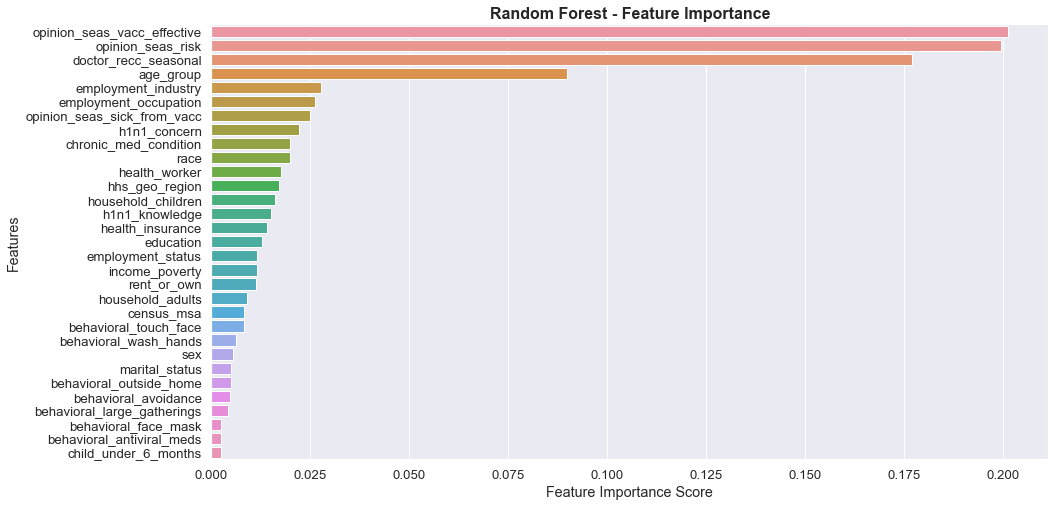

In [131]:
importance = grid_search_rf.best_estimator_.feature_importances_
feature_imp = pd.Series(importance, index = X.columns).sort_values(ascending = False)
feature_imp
sns.set(style = 'darkgrid', font_scale = 1.2)
plt.figure(figsize = (15, 8))
# Visualize the Importance Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importance', weight = 'bold', fontsize = 16)
plt.show()

# Conclusion:

* People who have more concerned about seasonal vaccine are more likely to be vaccinated.
* There are very few people who take antiviral medications and 50% of them get vaccinated while the rest do not. And there are lot of people who didn't take antiviral medications who have also taken a good amount of vaccine.
* We observe that most people get vaccination on doctor's recommendation.
* Some have chronic medical conditions those also getting vaccinated in large amount.
* Health worker rate will be more of getting seasonal flu vaccine as compare to who doesn't health worker.
* More people get vaccine and they said seasonal vaccine is very effective.
* Respondent's opinion about risk of getting sick seasonal flu without vaccine is very high and more of them get vaccinated.
* Respondent's opinion are not at all worried of getting sick from seasonal vaccine and more people are get vaccinated.